In [1]:
import matplotlib.pyplot as plt

In [2]:
from scipy.signal import spectrogram

In [3]:
import numpy as np

In [4]:
import pickle, glob

In [5]:
import sys,os

In [6]:
from scipy.fftpack import fft

In [7]:
Path_FieldTrip = "/buffer_bci-master/dataAcq/buffer/python"
sys.path.append(os.getcwd() + Path_FieldTrip)

import FieldTrip

In [8]:
Path_Preproc = "/buffer_bci-master/python/signalproc"
sys.path.append(os.getcwd() + Path_Preproc)


import preproc

In [9]:
ch = '''  1) Matched : FP1	 ->	 FP1
  2) Matched : FPz	 ->	 FPz
  3) Matched : FP2	 ->	 FP2
  4) Matched : AF7	 ->	 AF7
  5) Matched : AFz	 ->	 AFz
  6) Matched : AF8	 ->	 AF8
  7) Matched : F3	 ->	 F3
  8) Matched : Fz	 ->	 Fz
  9) Matched : F4	 ->	 F4
 10) Matched : FC5	 ->	 FC5
 11) Matched : FC1	 ->	 FC1
 12) Matched : FC2	 ->	 FC2
 13) Matched : FC6	 ->	 FC6
 14) Matched : T9	 ->	 T9
 15) Matched : C3	 ->	 C3
 16) Matched : Cz	 ->	 Cz
 17) Matched : C4	 ->	 C4
 18) Matched : T10	 ->	 T10
 19) Matched : CP1	 ->	 CP1
 20) Matched : CP2	 ->	 CP2
 21) Matched : P3	 ->	 P3
 22) Matched : Pz	 ->	 Pz
 23) Matched : P4	 ->	 P4
 24) Matched : TP9	 ->	 TP9
 25) Matched : P7	 ->	 P7
 26) Matched : POz	 ->	 POz
 27) Matched : O1	 ->	 O1
 28) Matched : Oz	 ->	 Oz
 29) Matched : O2	 ->	 O2
 30) Matched : TP10	 ->	 TP10'''

In [10]:
ch_32 = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32[str(i.split(')')[0].replace(' ',''))] = str(i.split('->')[-1].replace('	 ',''))
ch_32['1']

'FP1'

In [11]:
ch_32_r = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32_r[str(i.split('->')[-1].replace('	 ',''))] = str(i.split(')')[0].replace(' ',''))

Processin the data form the file 4 up to 15

In [12]:
 # 0 - left, 1 -right, 2 - both

values_hands = {'0':'left', '1':'right', '2':'both' }

In [13]:
exp = [0,0,0,0]
for i in range(4,16):
    file = 'data/training_data_imagined_movement-'
    print(i, file+str(i)+'.pk')
    f = open(file+str(i)+'.pk', 'rb')
    exp.append(pickle.load(f))

4 data/training_data_imagined_movement-4.pk
5 data/training_data_imagined_movement-5.pk
6 data/training_data_imagined_movement-6.pk
7 data/training_data_imagined_movement-7.pk
8 data/training_data_imagined_movement-8.pk
9 data/training_data_imagined_movement-9.pk
10 data/training_data_imagined_movement-10.pk
11 data/training_data_imagined_movement-11.pk
12 data/training_data_imagined_movement-12.pk
13 data/training_data_imagined_movement-13.pk
14 data/training_data_imagined_movement-14.pk
15 data/training_data_imagined_movement-15.pk


In [48]:
left_hand_mov = []
right_hand_mov = []
both_hands_mov = []



#Counters

right = 0
left = 0
both = 0


for n_exp in range(4,16):
    print(' ***********   Experiment  '+str(n_exp)+'   *********** ')
    data           =   np.array(exp[n_exp]['data'])   #data support variable
    data           =   np.transpose(data)
    data           =   preproc.detrend(data)
    data           =   preproc.spatialfilter(data, type = 'spatialfilter')
    data, freqs    =   preproc.powerspectrum(data,dim = 1,fSample=exp[i]['hdr'].fSample)
    
    #data,freqIdx  =   preproc.selectbands(data,dim=1,band=freqbands,bins=freqs)  #Check out later
    
    print(freqs)
    
    print(data.shape)
    
    n_events = data.shape[2]
    for event in range(n_events):
        
        print(exp[n_exp]['events'][event].value[0])
        
        if exp[n_exp]['events'][event].value[0] == 0:
            print('left')
            left = left + 1
            left_hand_mov.append(data[:,:,event])
        
        
        if exp[n_exp]['events'][event].value[0] == 1:
            print('right')
            right = right +1
            right_hand_mov.append(data[:,:,event])
        
            
        if exp[n_exp]['events'][event].value[0] == 2:
            print('both')
            both = both + 1
            both_hands_mov.append(data[:,:,event])
           

left_hand_mov    =   np.array(left_hand_mov)
right_hand_mov   =   np.array(right_hand_mov)
both_hands_mov   =   np.array(both_hands_mov)

 ***********   Experiment  4   *********** 
[  0.           0.33333333   0.66666667   1.           1.33333333
   1.66666667   2.           2.33333333   2.66666667   3.
   3.33333333   3.66666667   4.           4.33333333   4.66666667
   5.           5.33333333   5.66666667   6.           6.33333333
   6.66666667   7.           7.33333333   7.66666667   8.
   8.33333333   8.66666667   9.           9.33333333   9.66666667
  10.          10.33333333  10.66666667  11.          11.33333333
  11.66666667  12.          12.33333333  12.66666667  13.
  13.33333333  13.66666667  14.          14.33333333  14.66666667
  15.          15.33333333  15.66666667  16.          16.33333333
  16.66666667  17.          17.33333333  17.66666667  18.
  18.33333333  18.66666667  19.          19.33333333  19.66666667
  20.          20.33333333  20.66666667  21.          21.33333333
  21.66666667  22.          22.33333333  22.66666667  23.
  23.33333333  23.66666667  24.          24.33333333  24.66666667
  25. 

In [39]:
both

84

---- 

preproc examples (check out later the select band thing) 

data_14 = np.array(exp[14]['data'])

data_14 = np.transpose(data_14)

data_14 = preproc.detrend(data_14)

for i in range(37):
    plt.plot(data_14[i,:,1])
    plt.show()

data_14 = preproc.spatialfilter(data_14 ,type='spatialfilter')

for i in range(37):
    plt.plot(data_14[i,:,1])
    plt.show()

data_14 ,freqs = preproc.powerspectrum(data_14,dim=1,fSample=exp[14]['hdr'].fSample)

for i in range(37):
    plt.plot(data_14[i,:,1][:50])
    print('')
    plt.show()

-------------------------

In [40]:
left_hand_mov.shape

(84, 37, 375)

In [41]:
right_hand_mov.shape

(84, 37, 375)

In [42]:
both_hands_mov.shape

(84, 37, 375)

In [43]:
%%html
<img src='mobita_32.png', width = 600, height = 600> 

Channels numbers

In [44]:
ch_32_r['C3']

'15'

In [45]:
ch_32_r['Cz']

'16'

In [46]:
ch_32_r['C4']

'17'

                 FP1


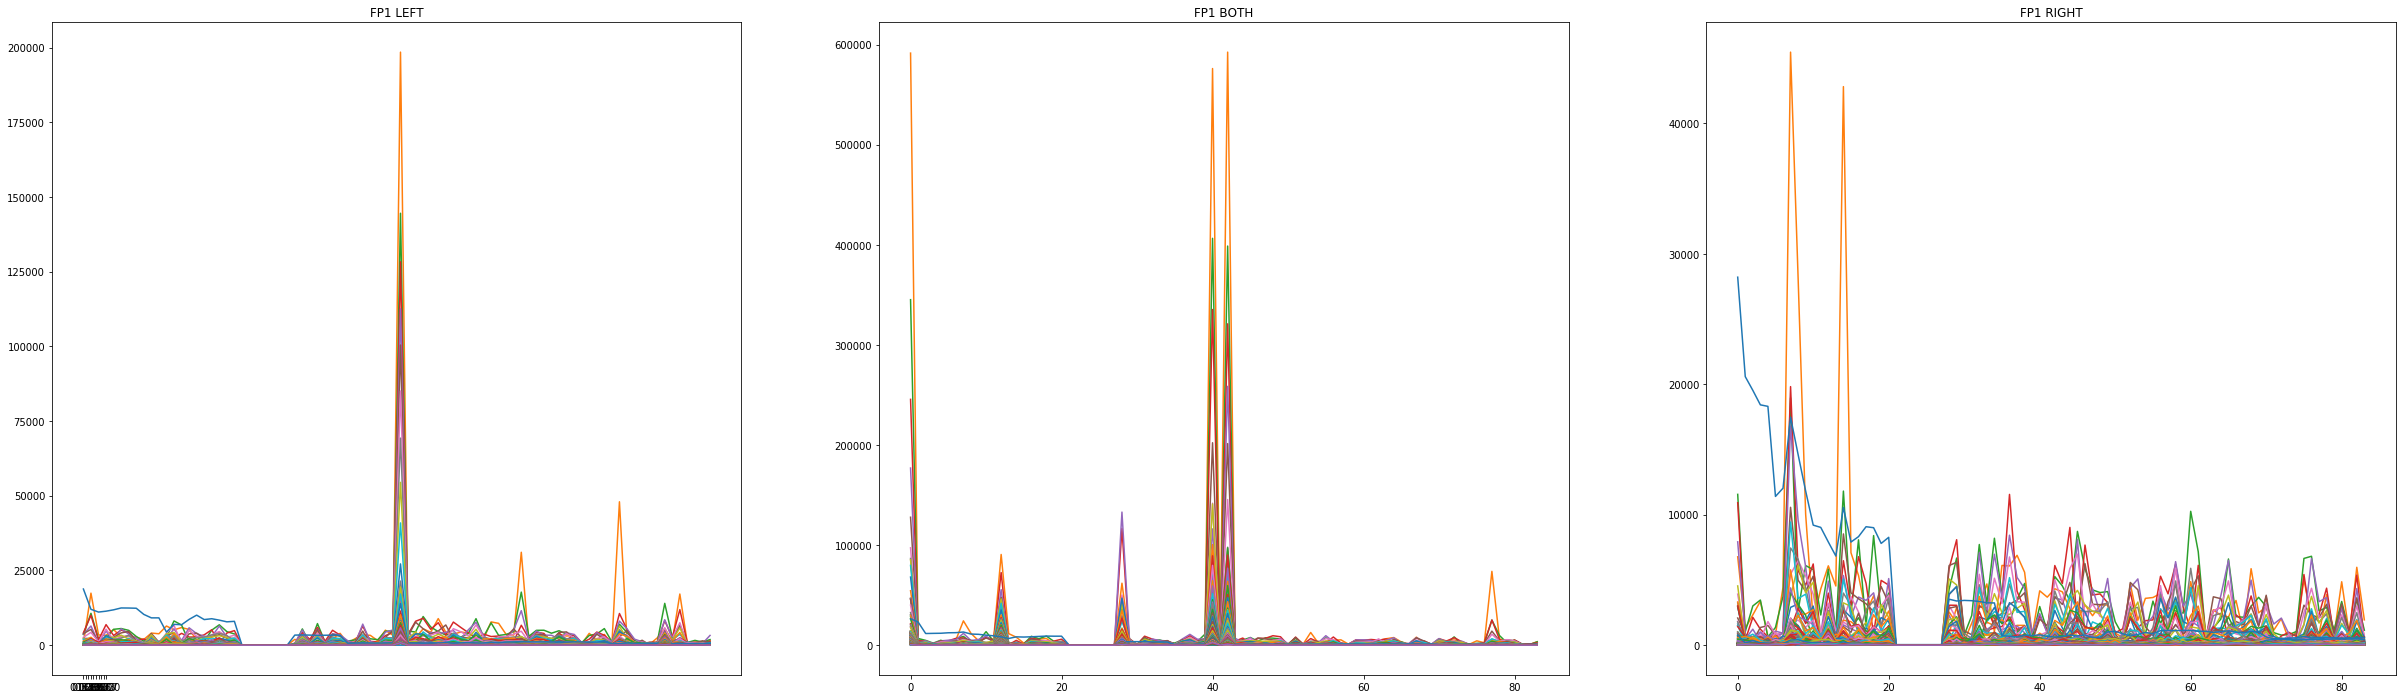

                 FPz


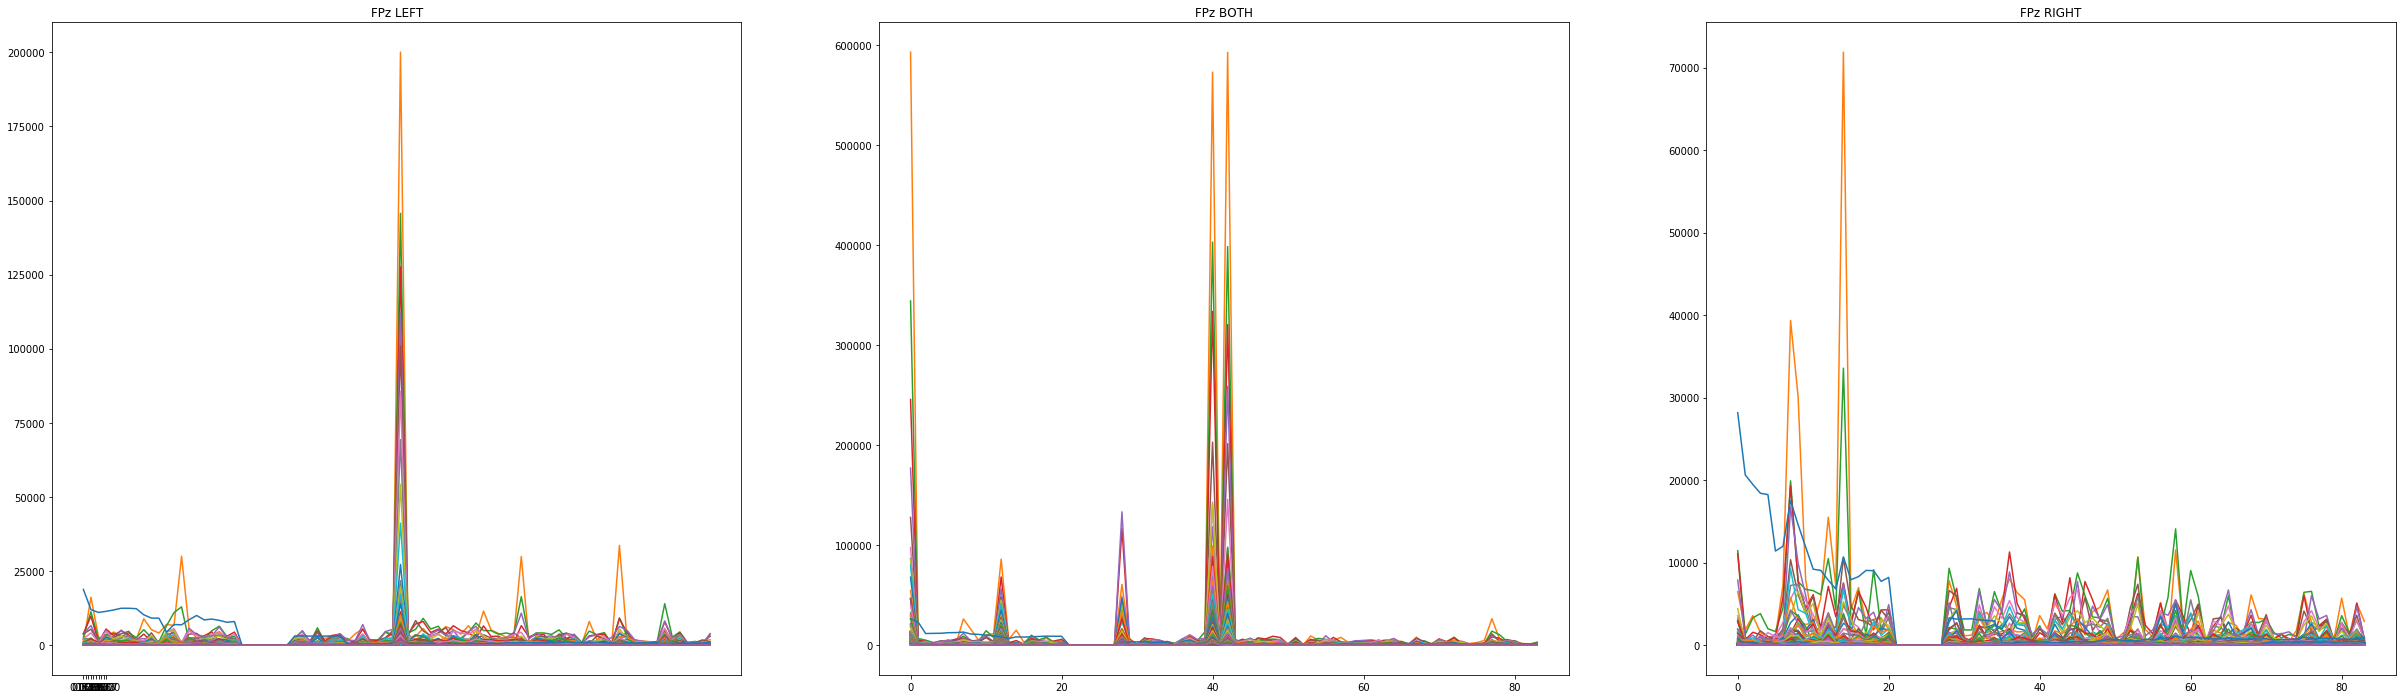

                 FP2


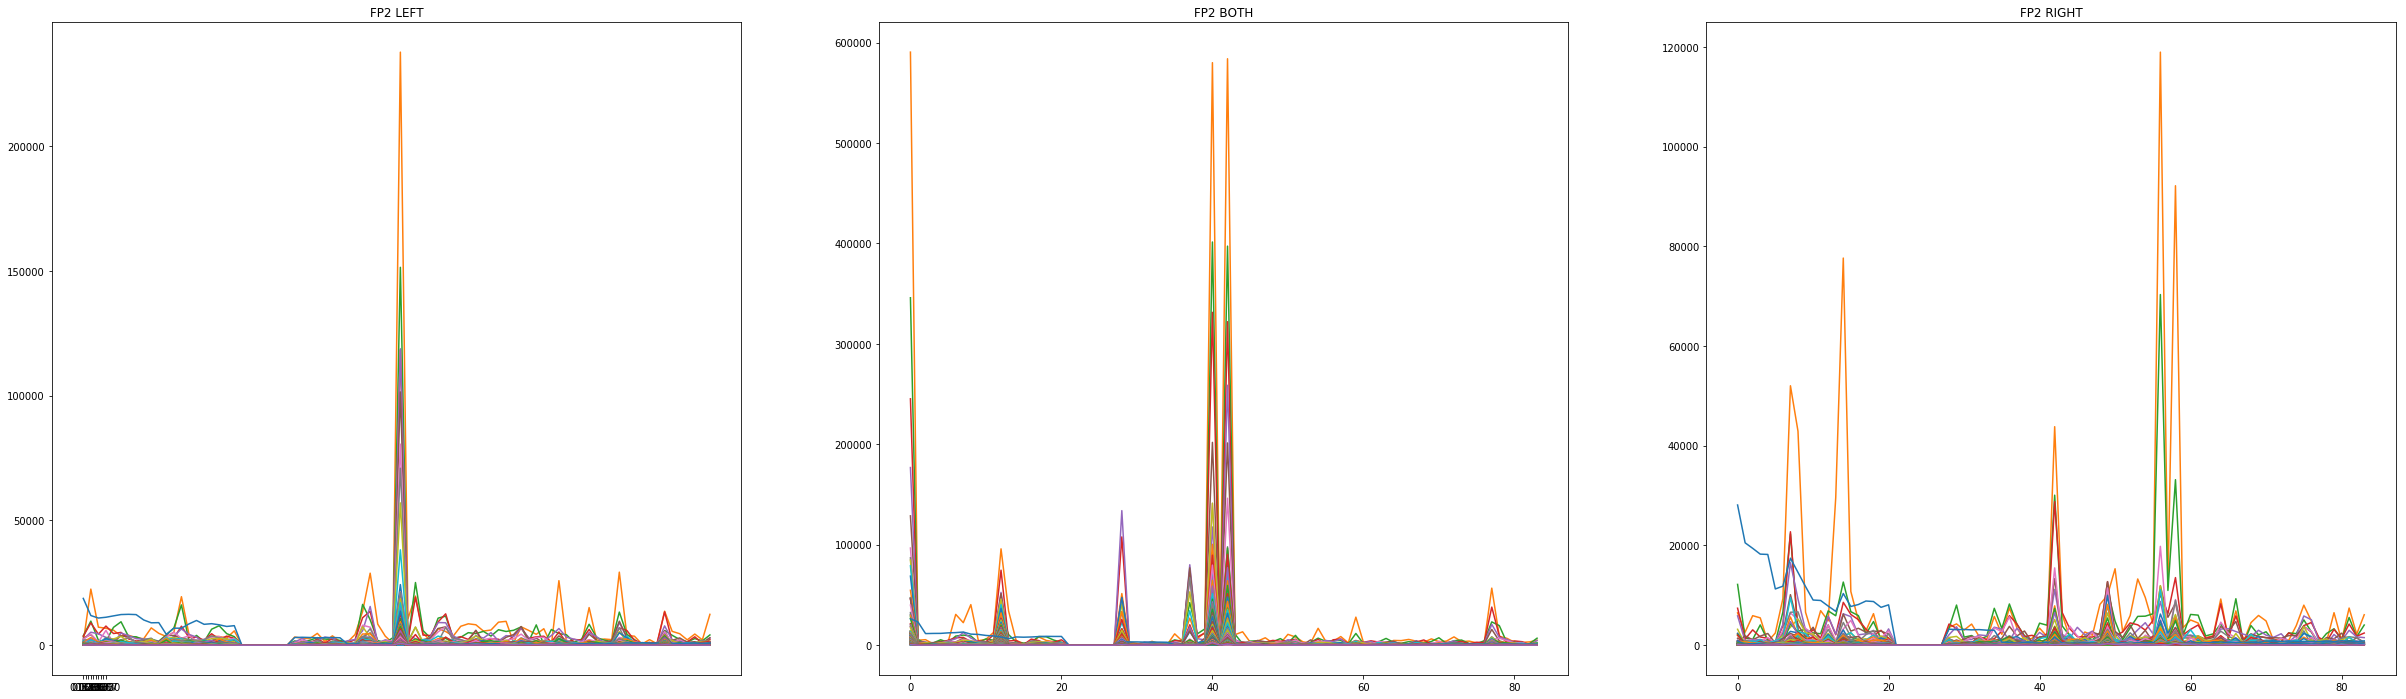

                 AF7


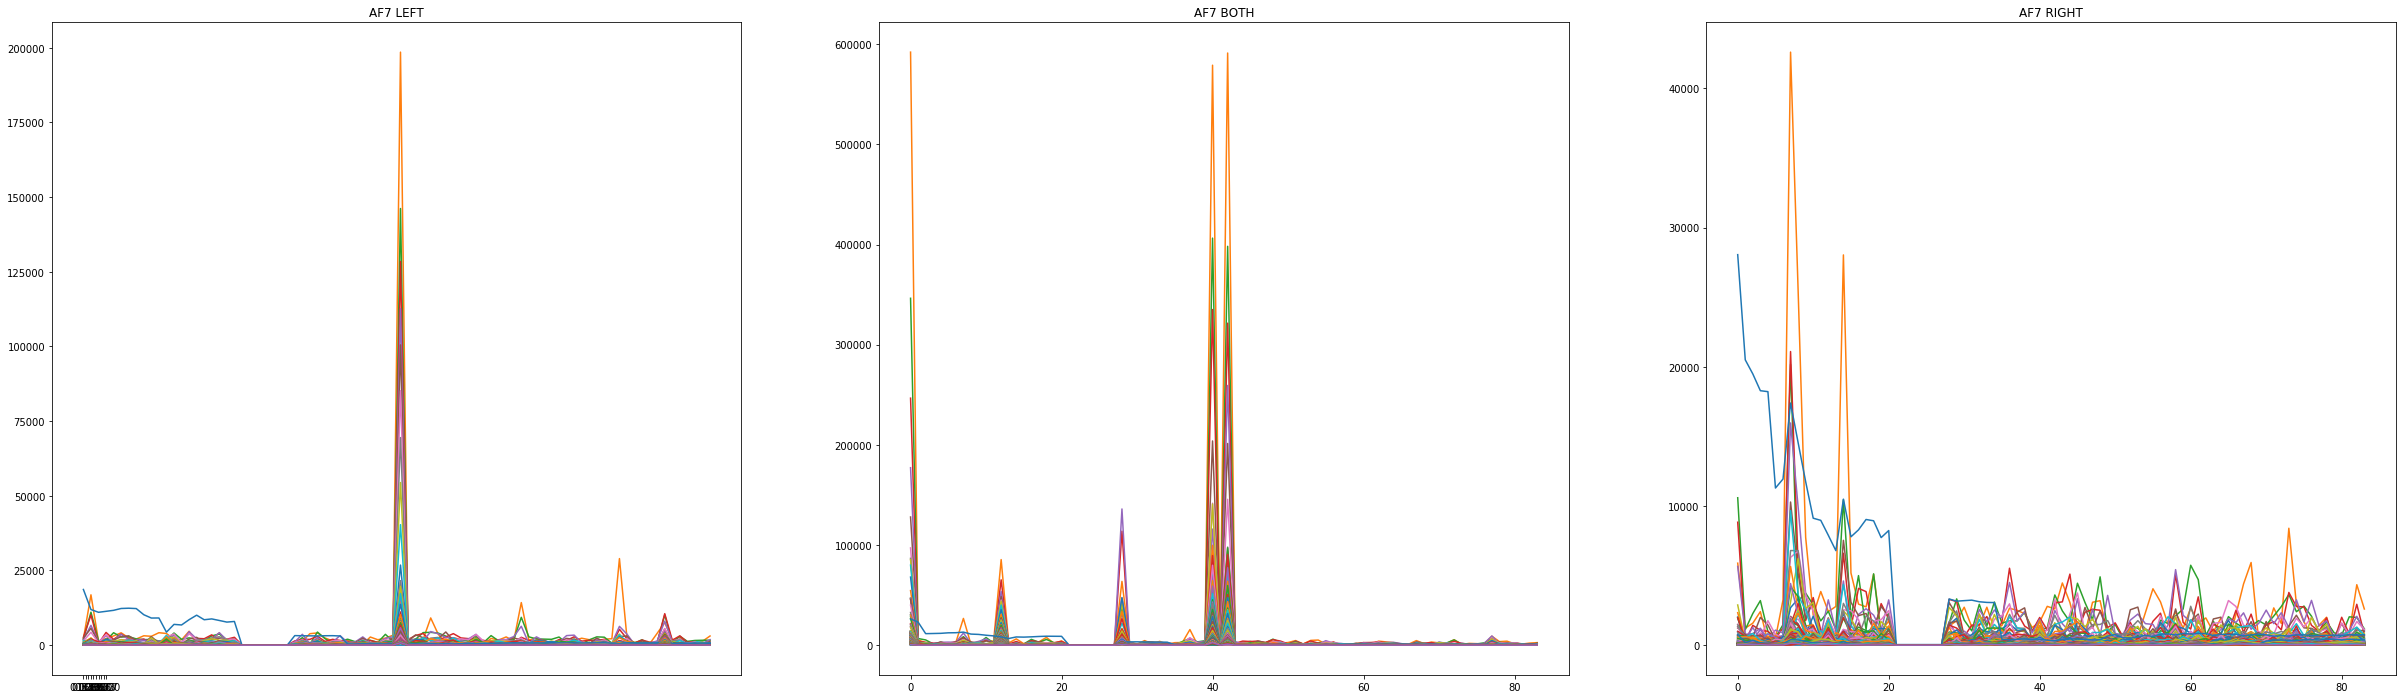

                 AFz


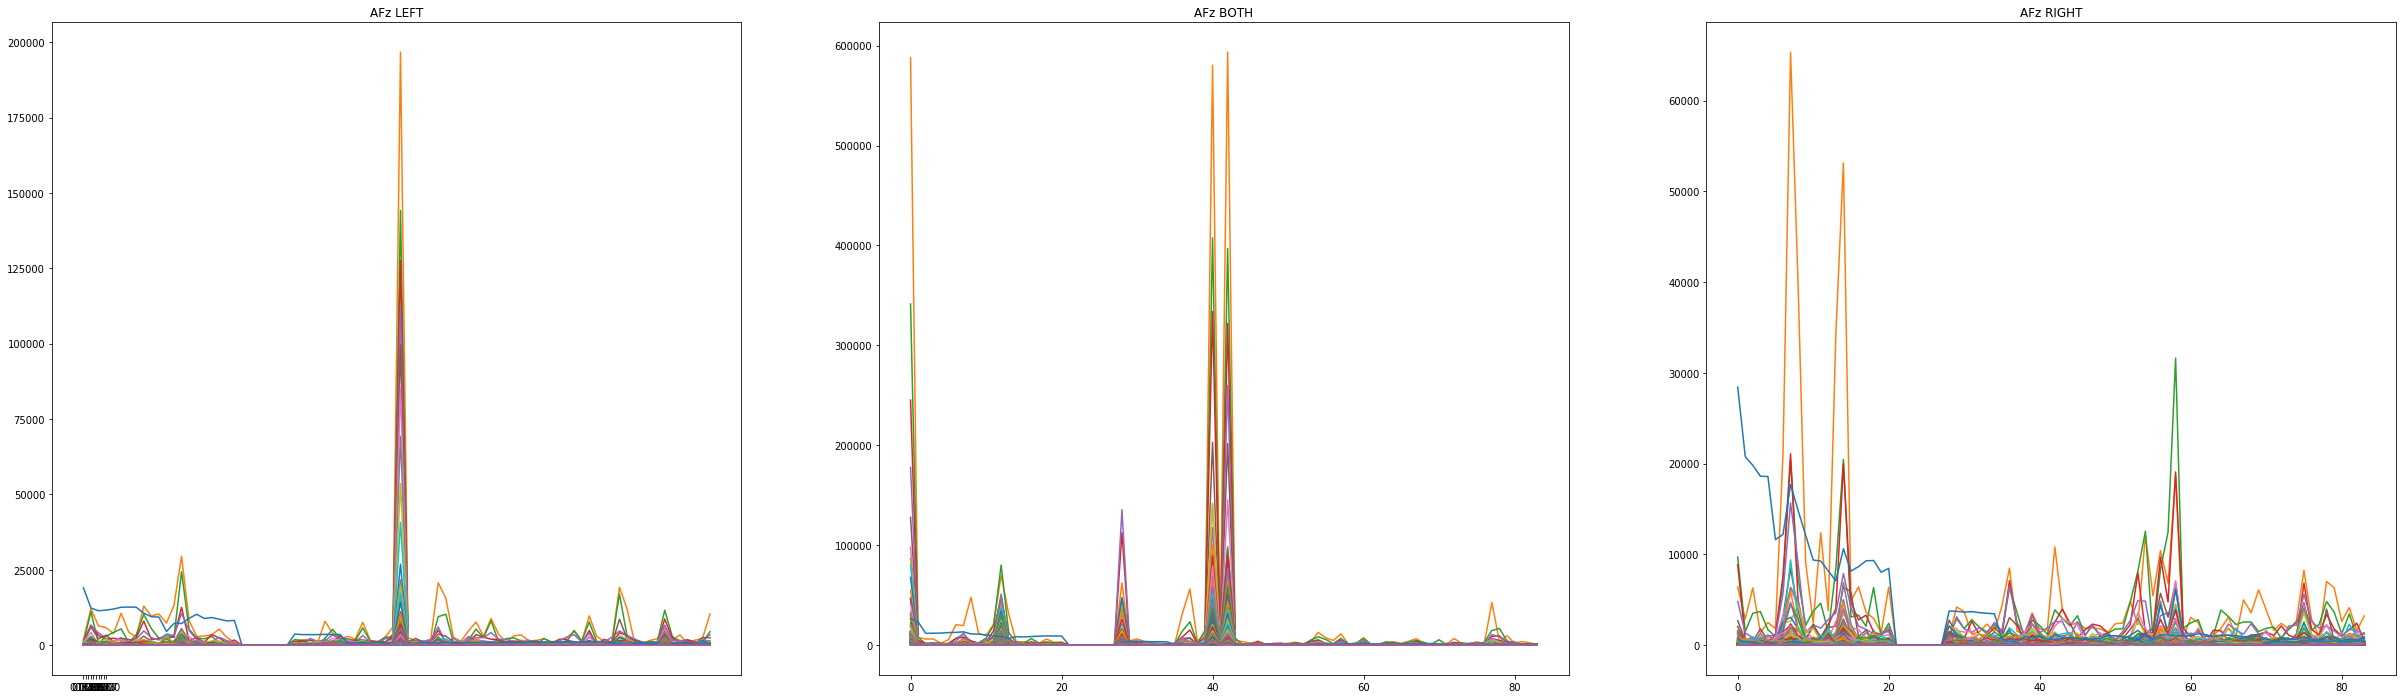

                 AF8


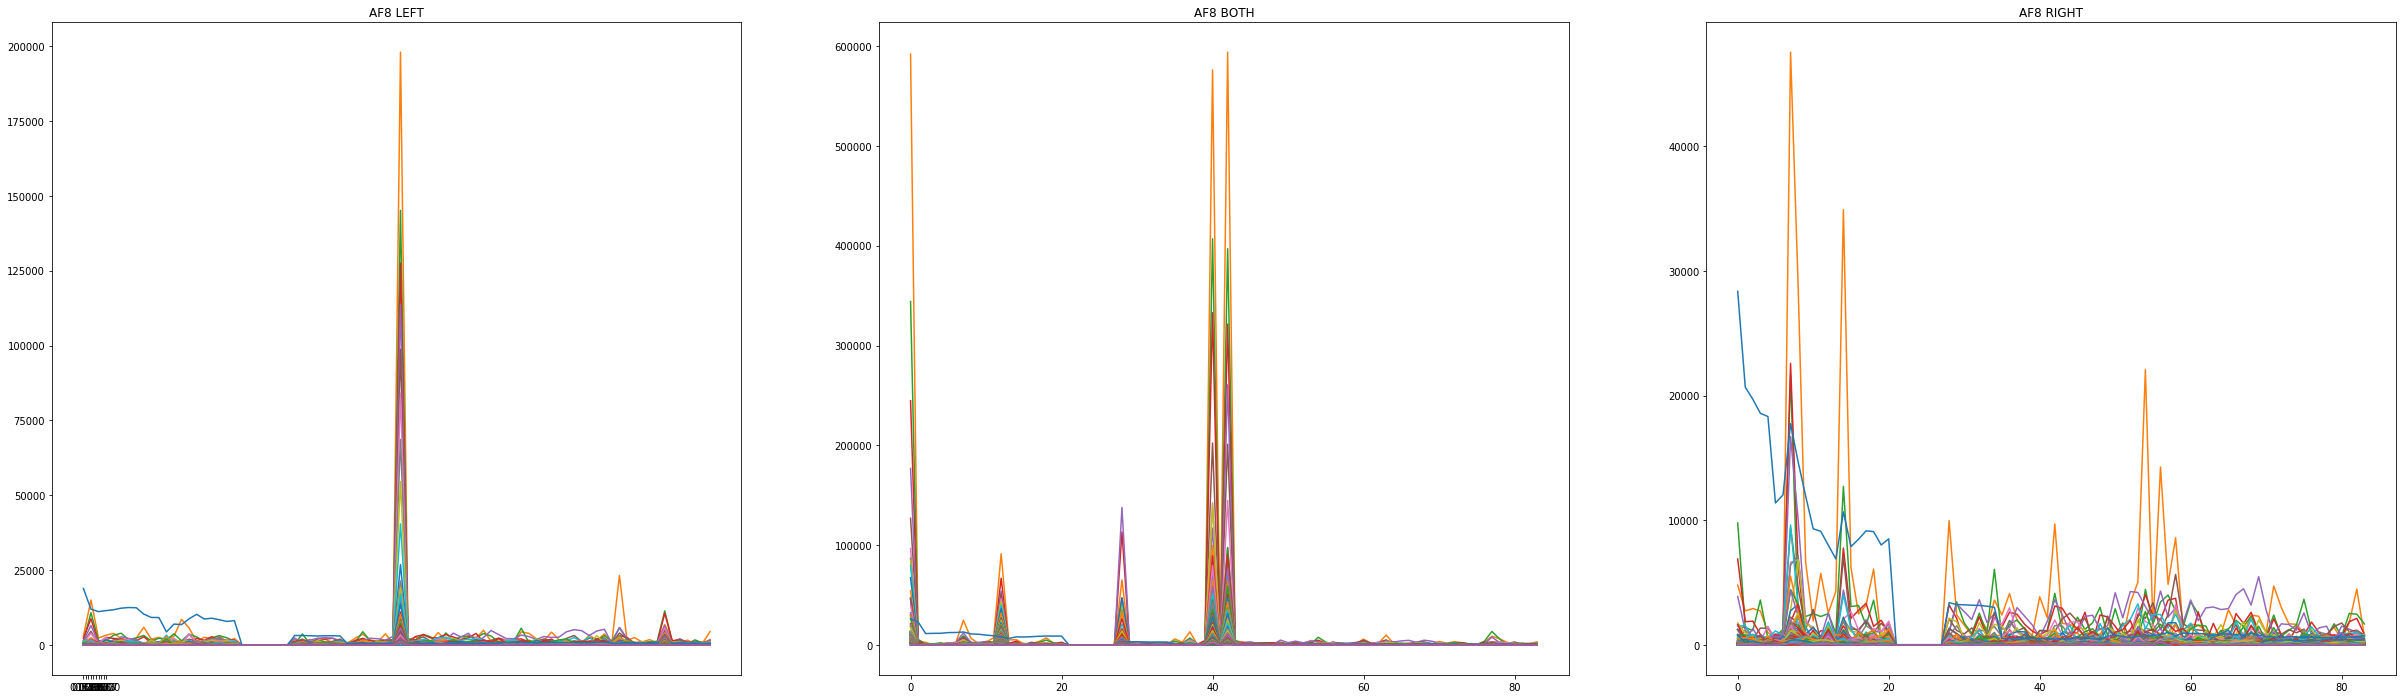

                 F3


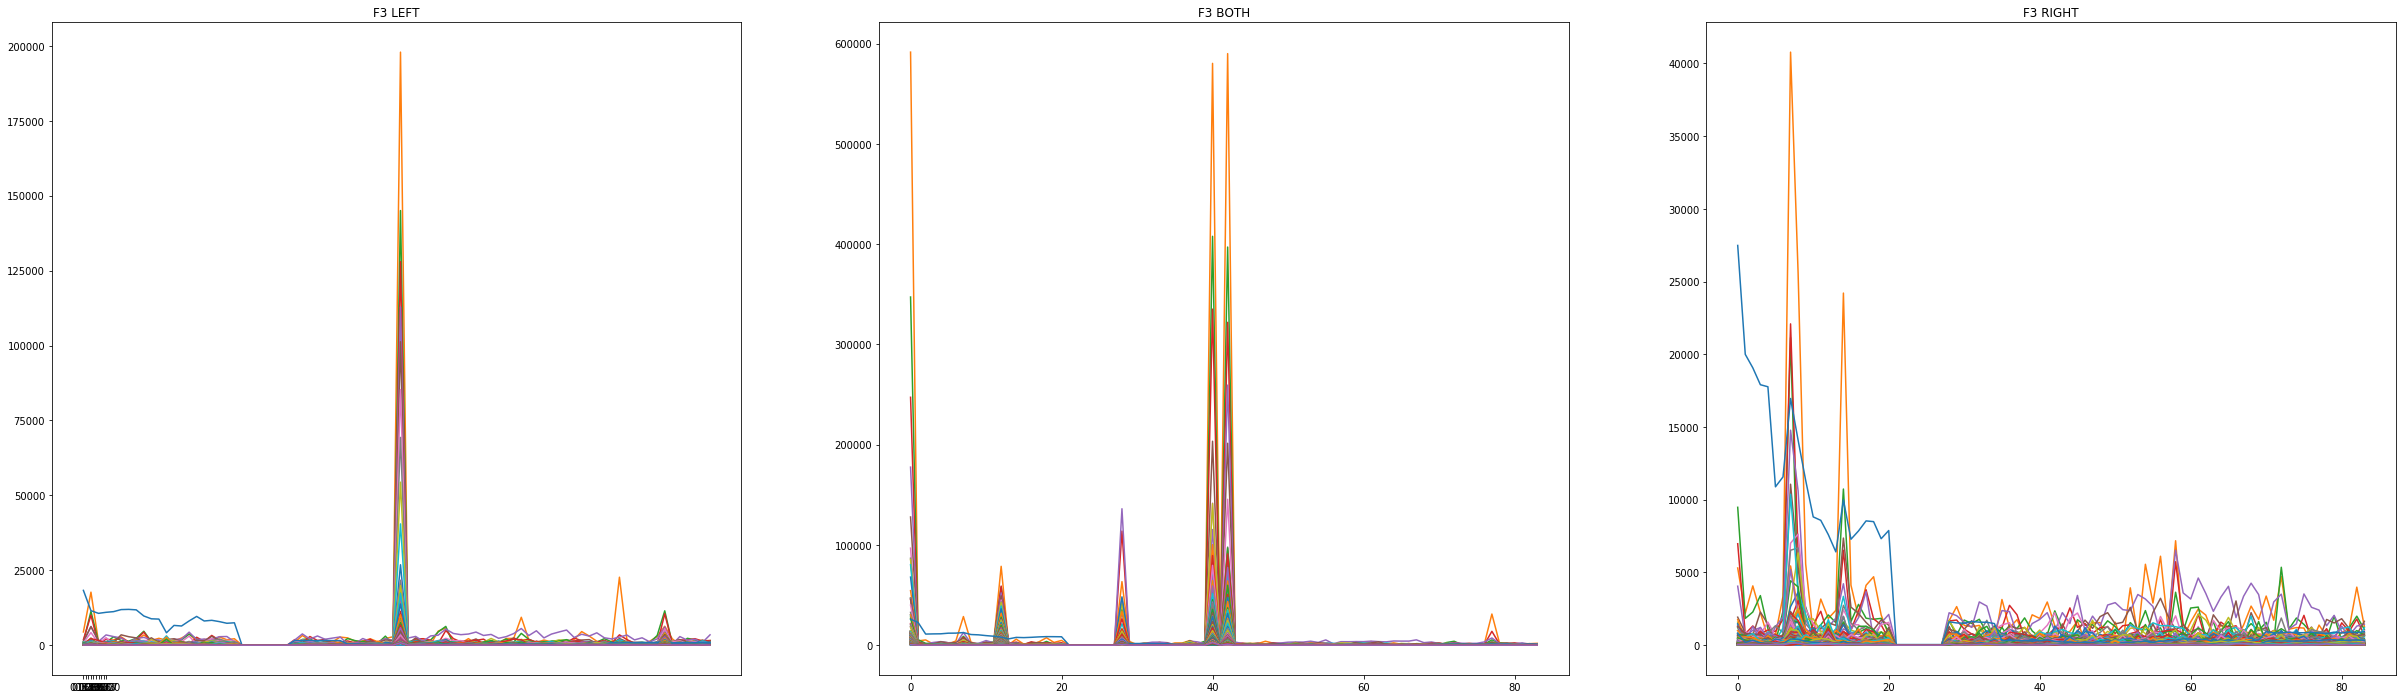

                 Fz


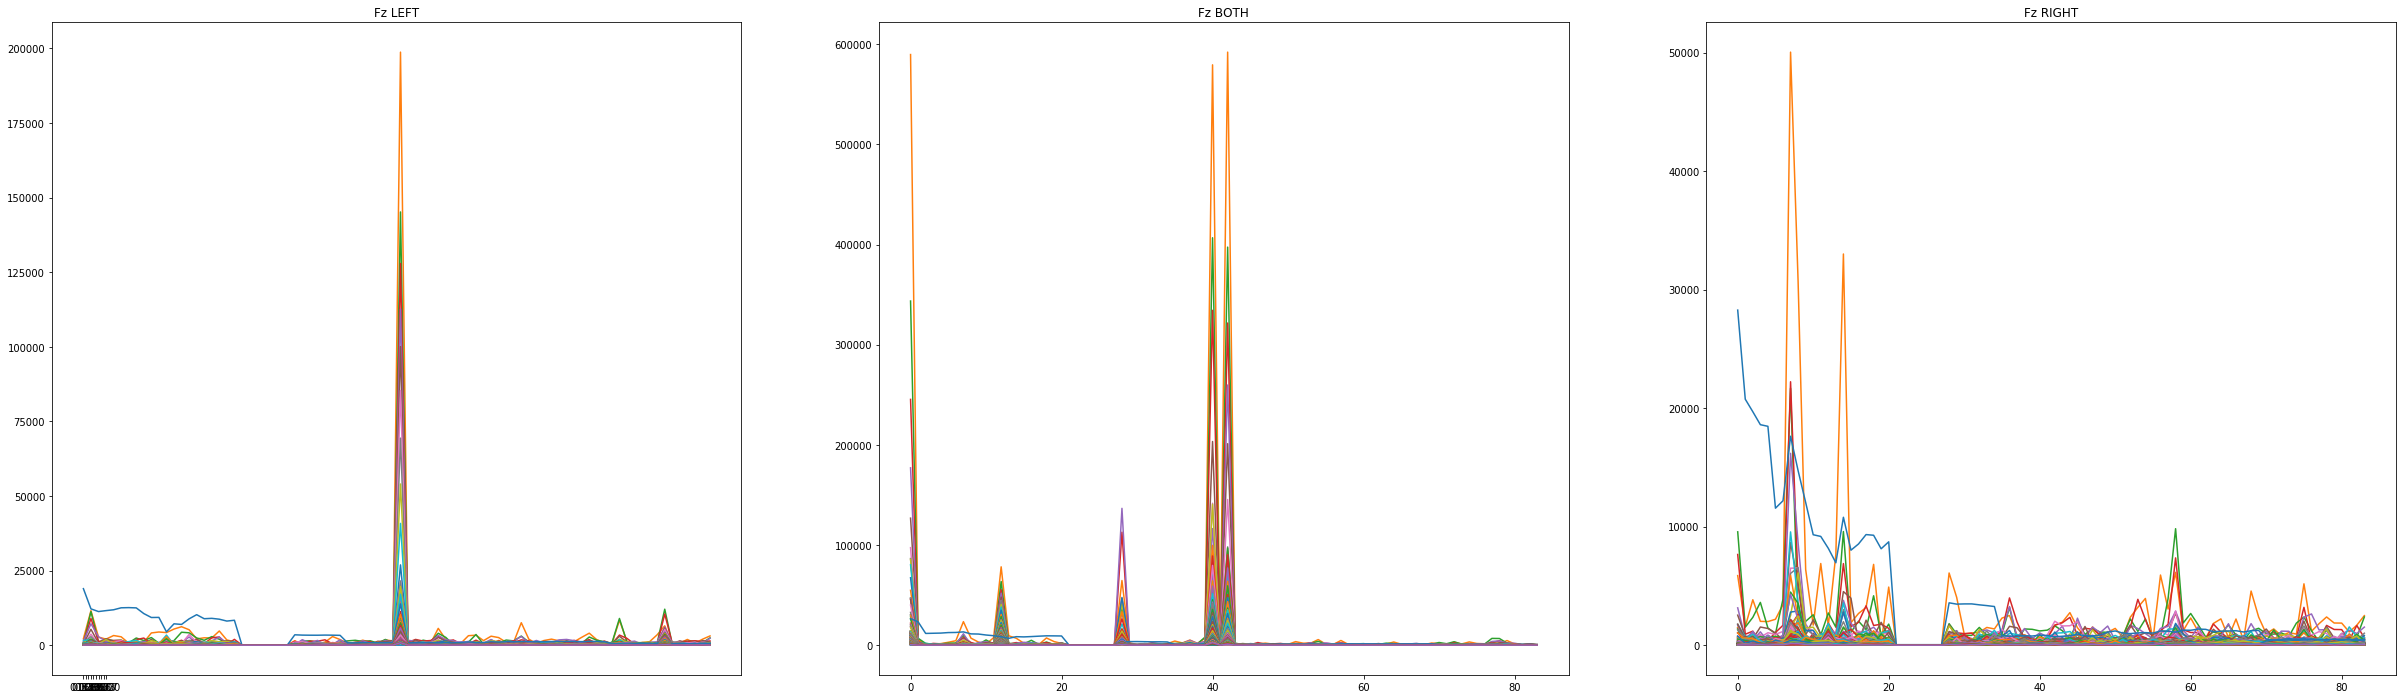

                 F4


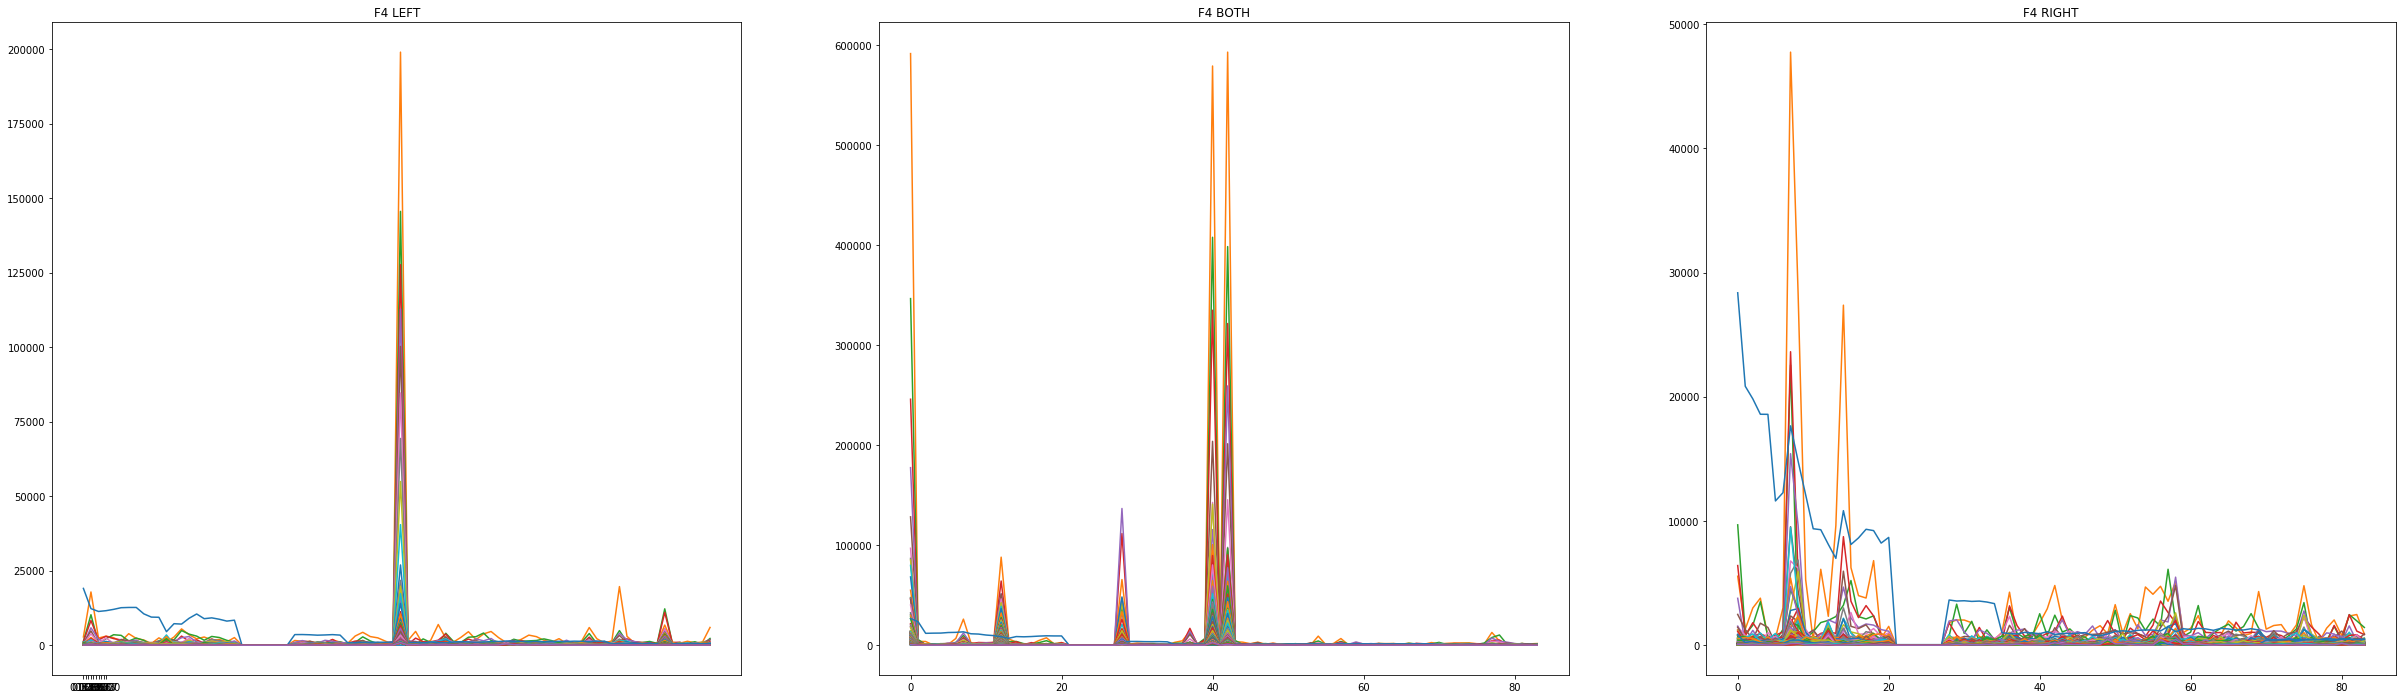

                 FC5


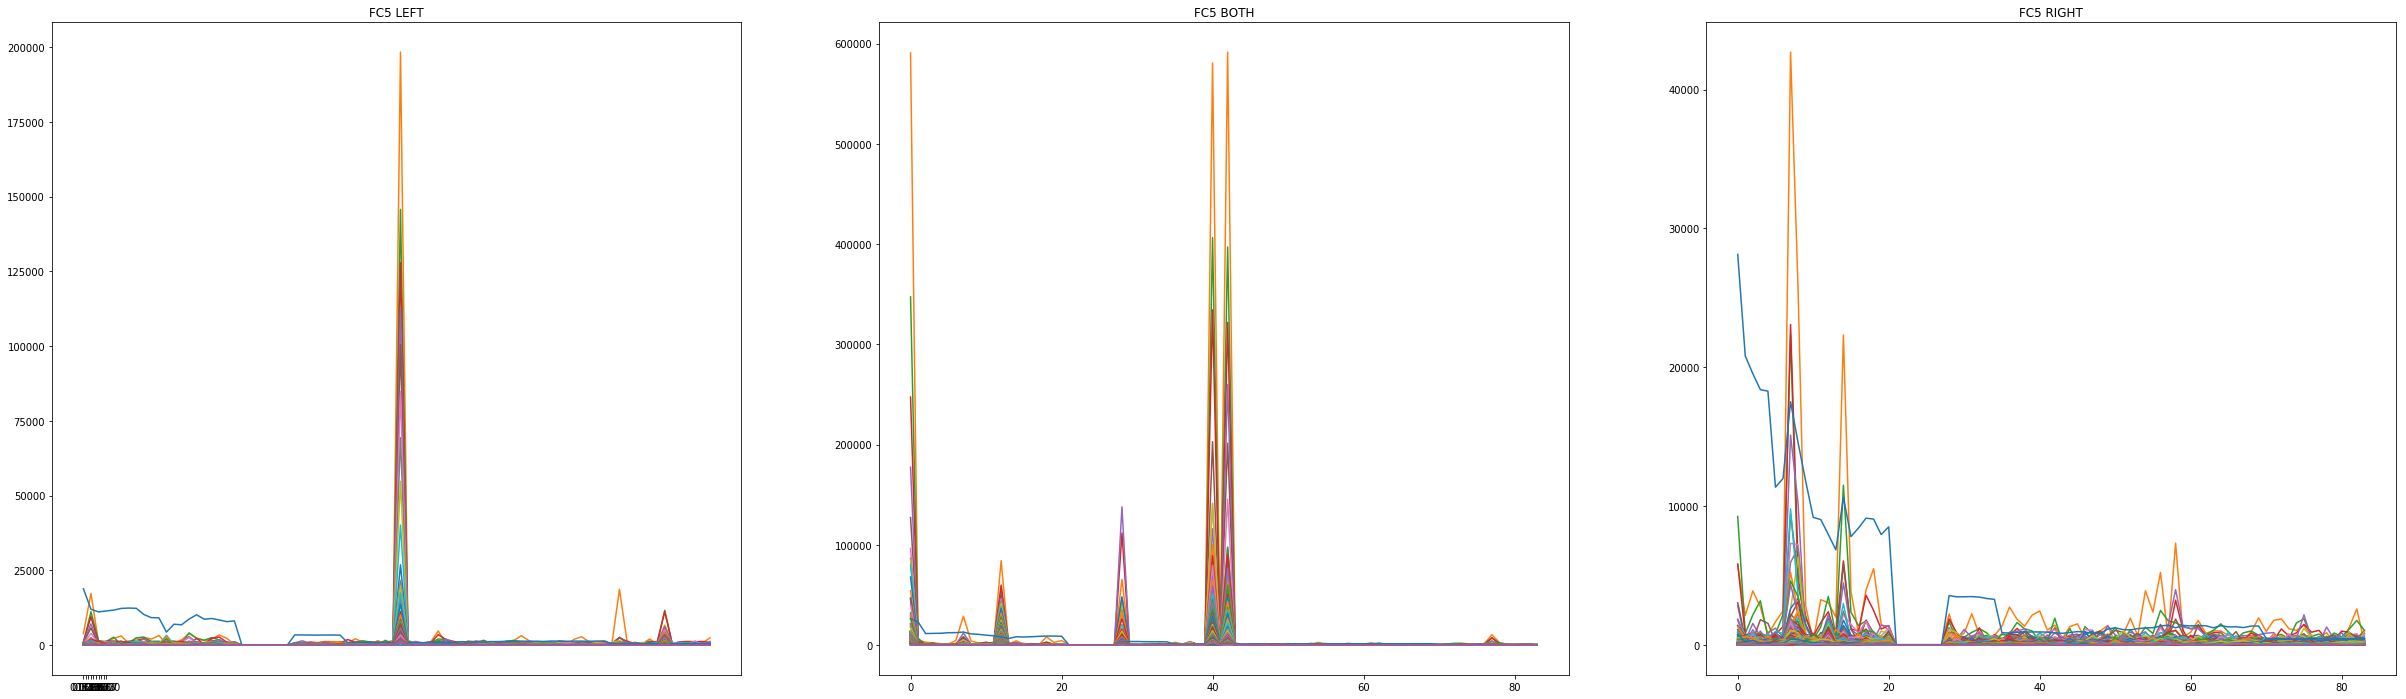

                 FC1


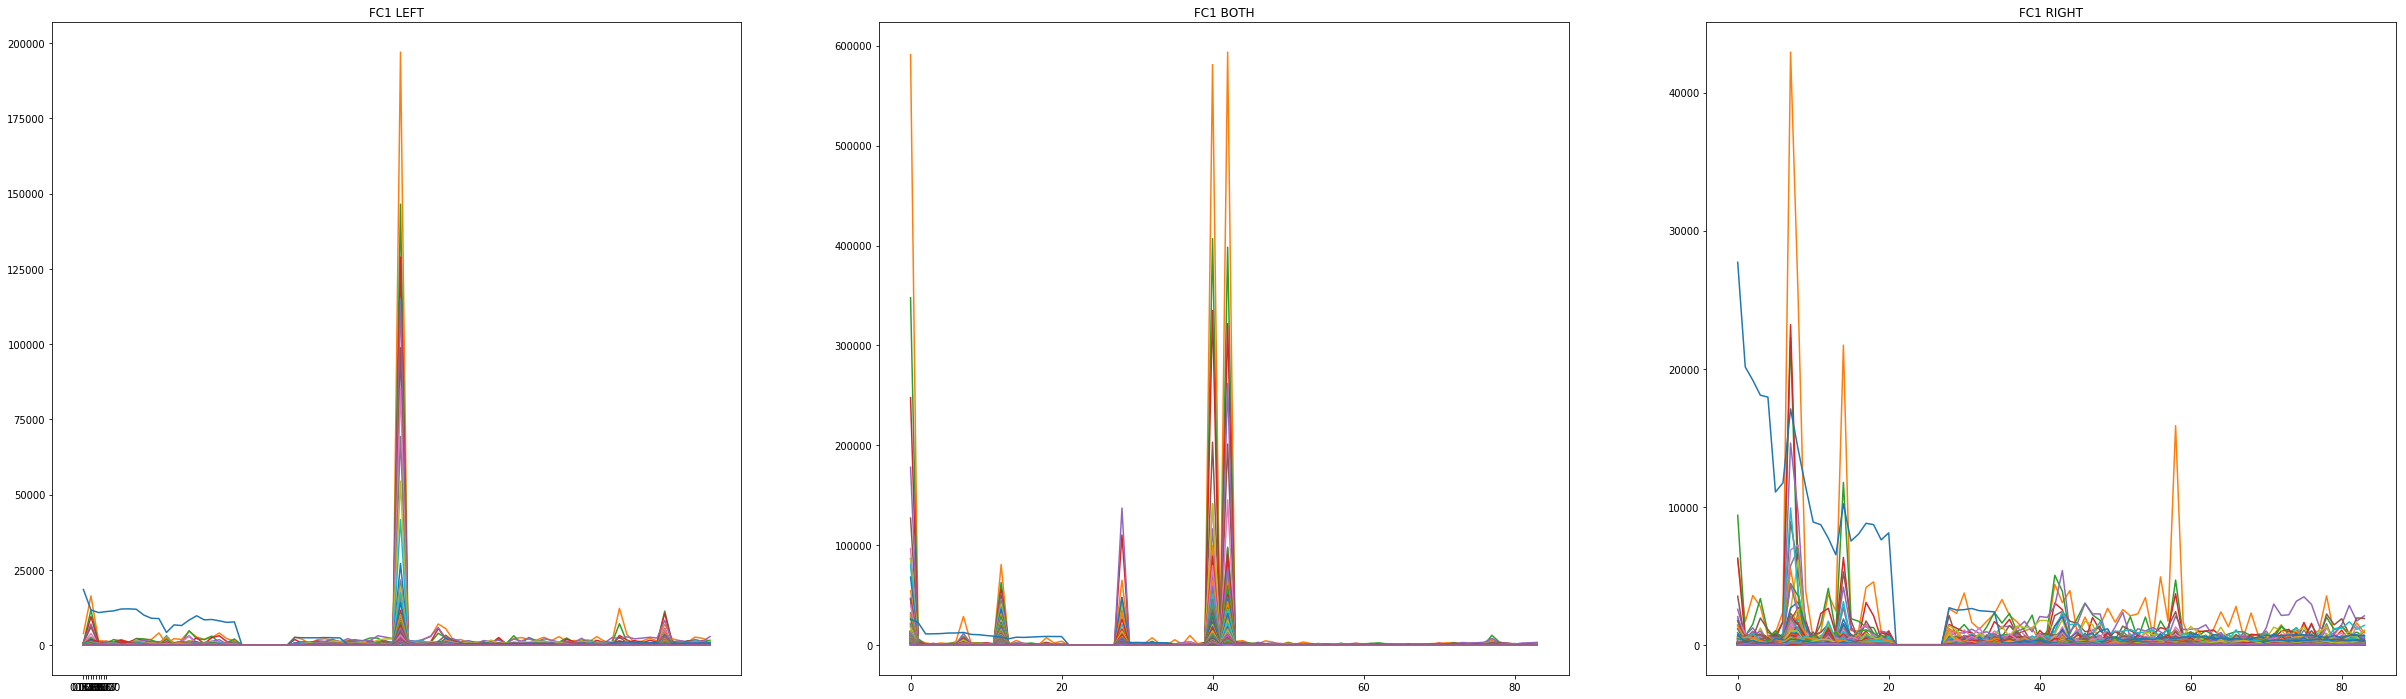

                 FC2


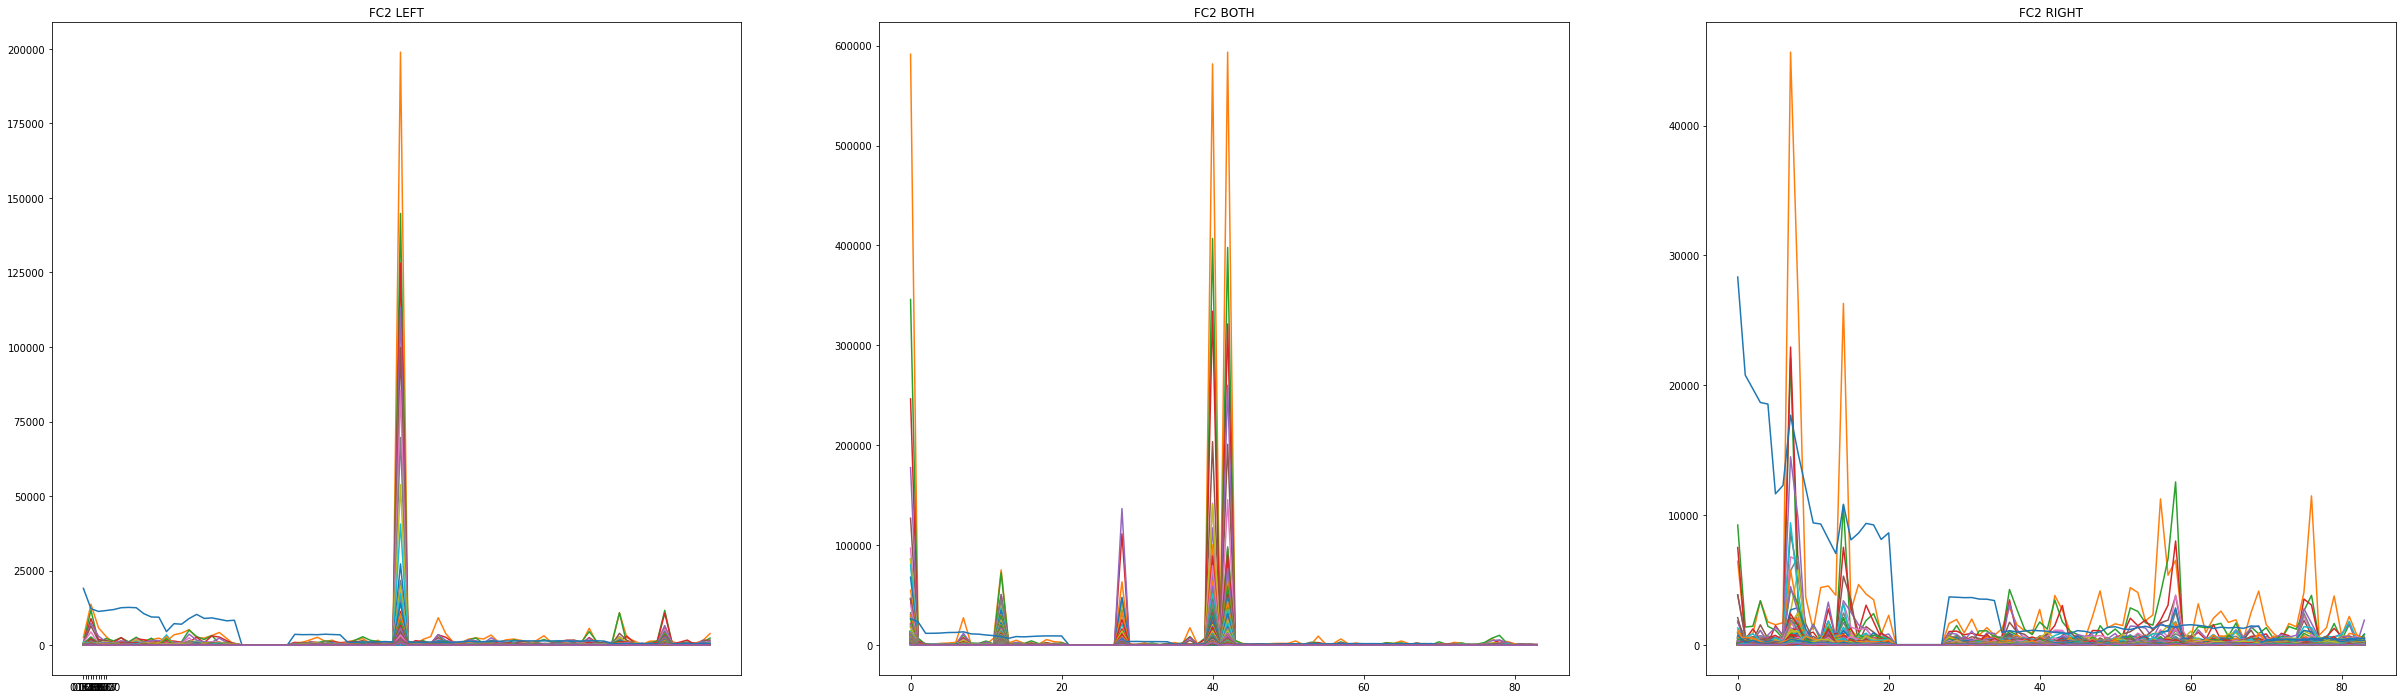

                 FC6


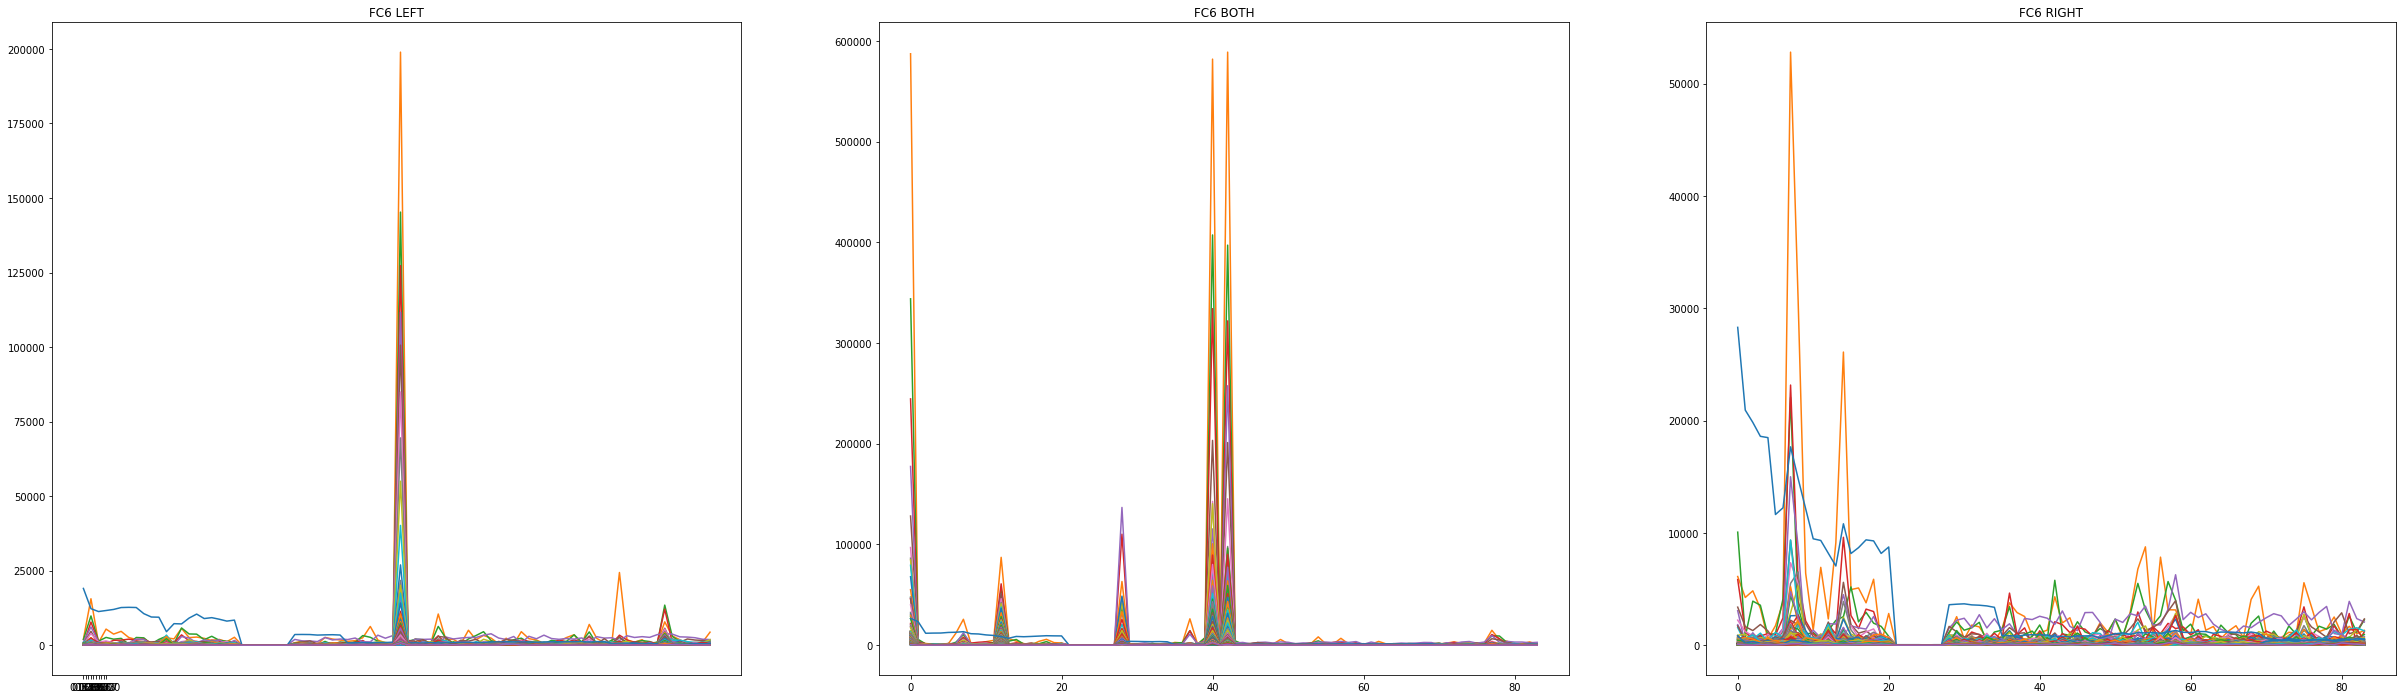

                 T9


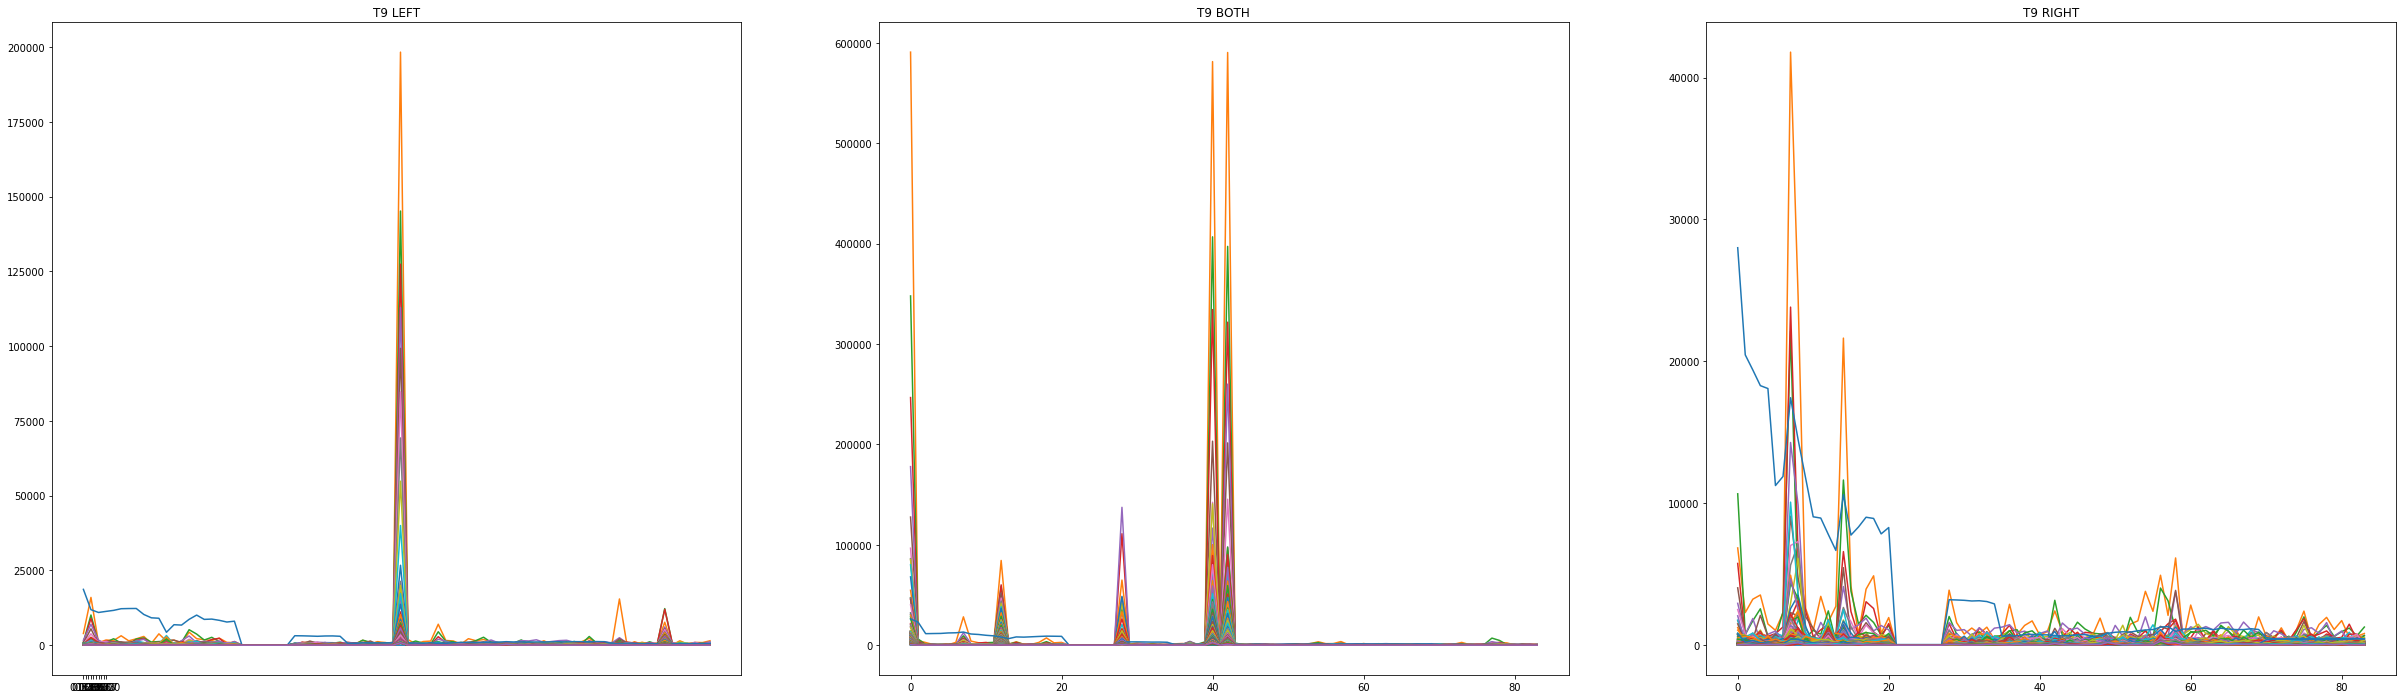

                 C3


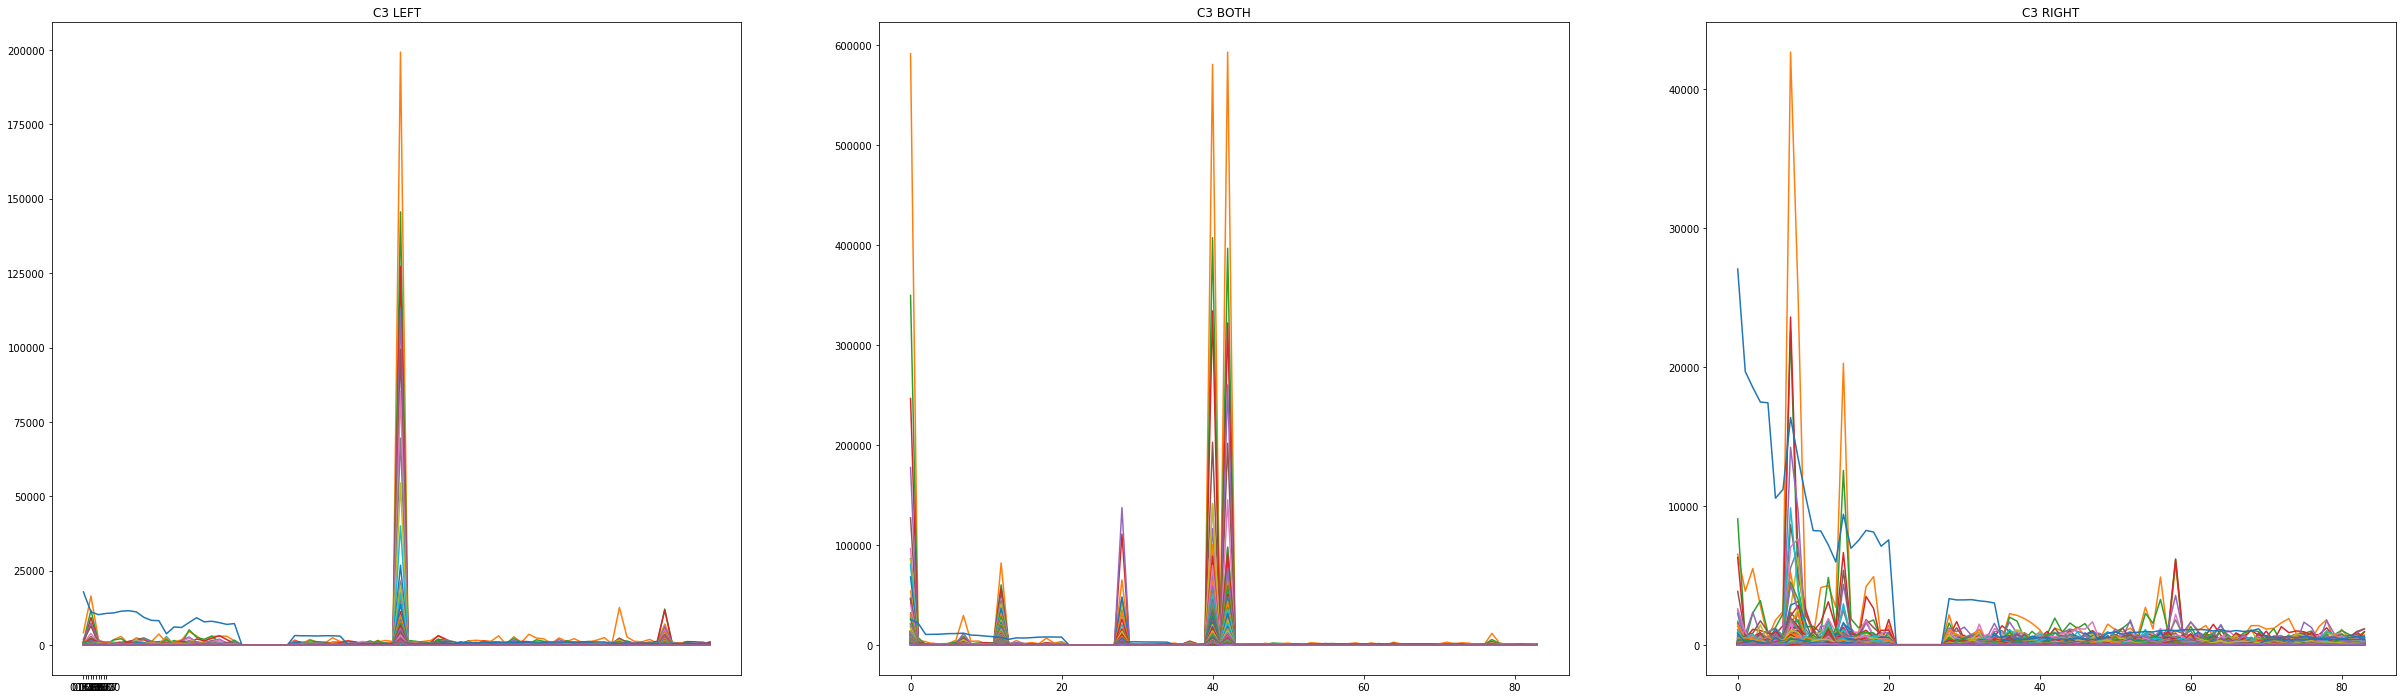

                 Cz


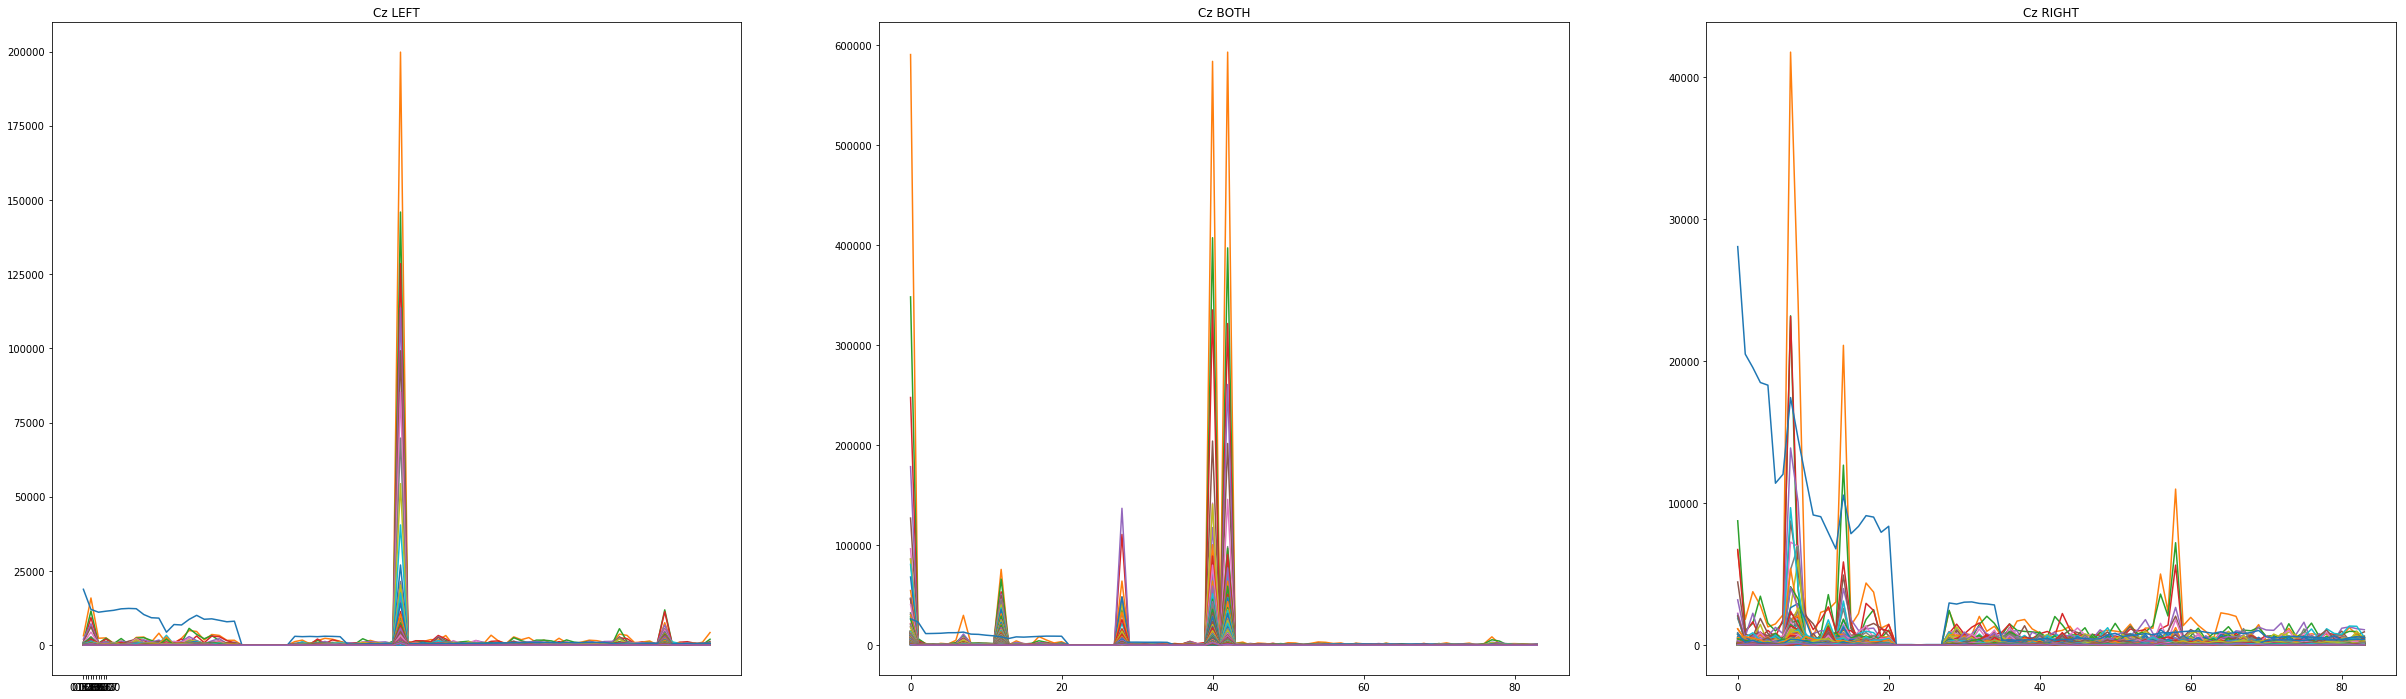

                 C4


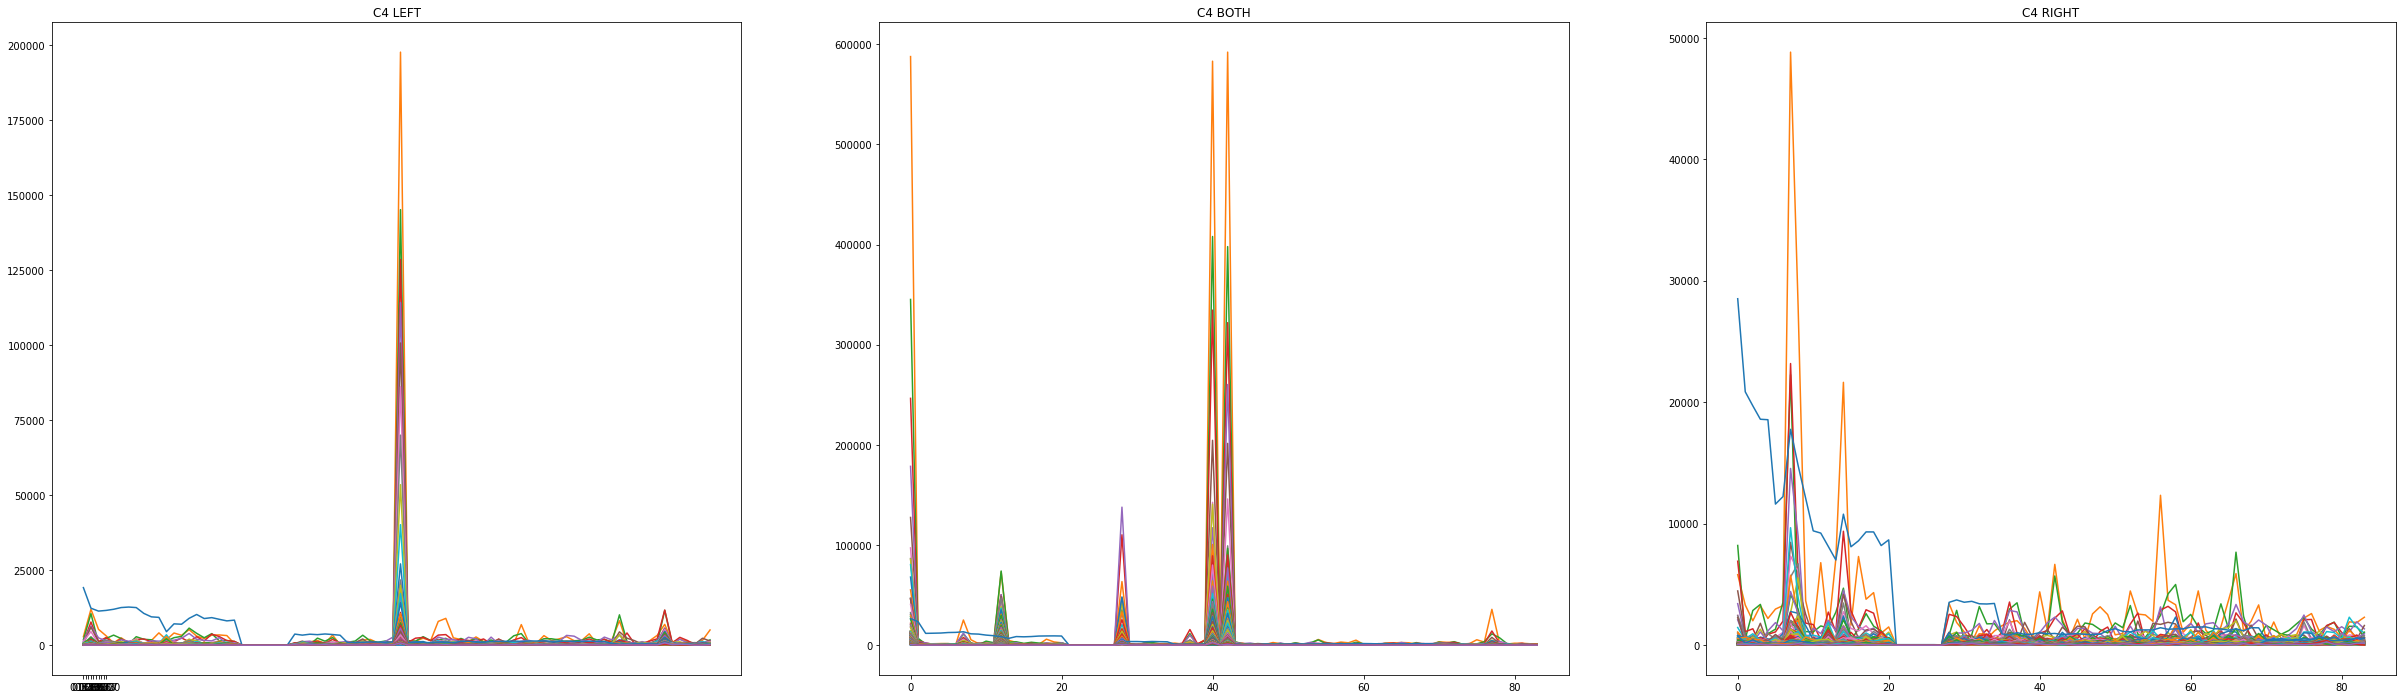

                 T10


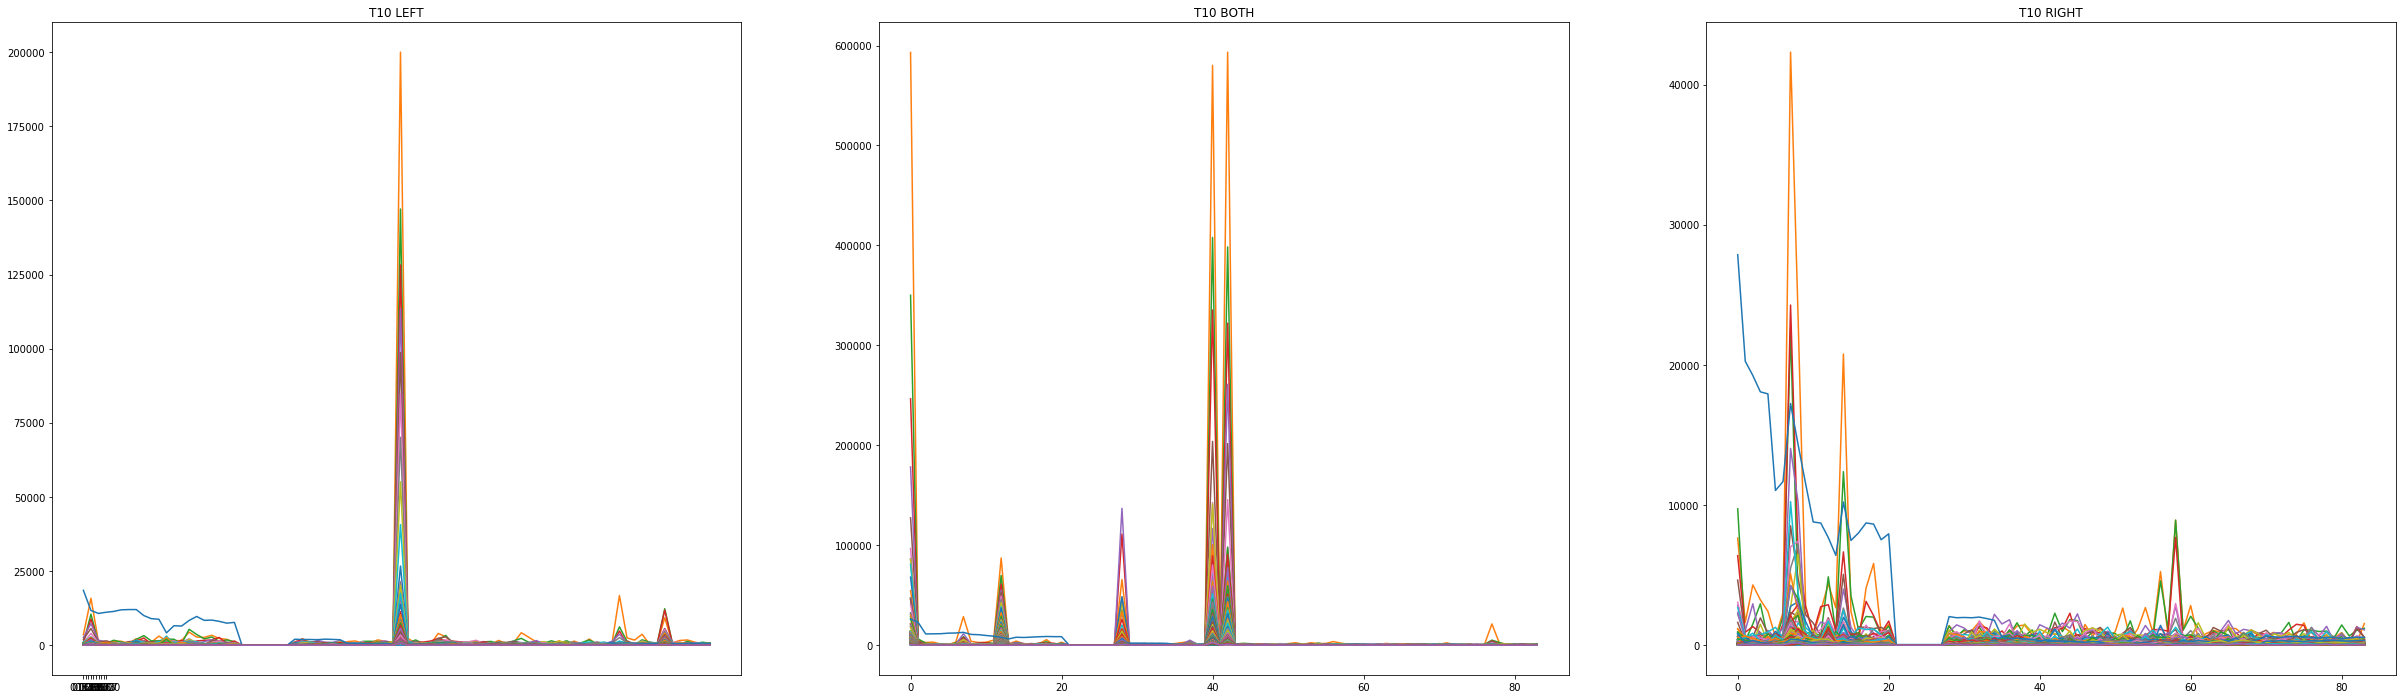

                 CP1


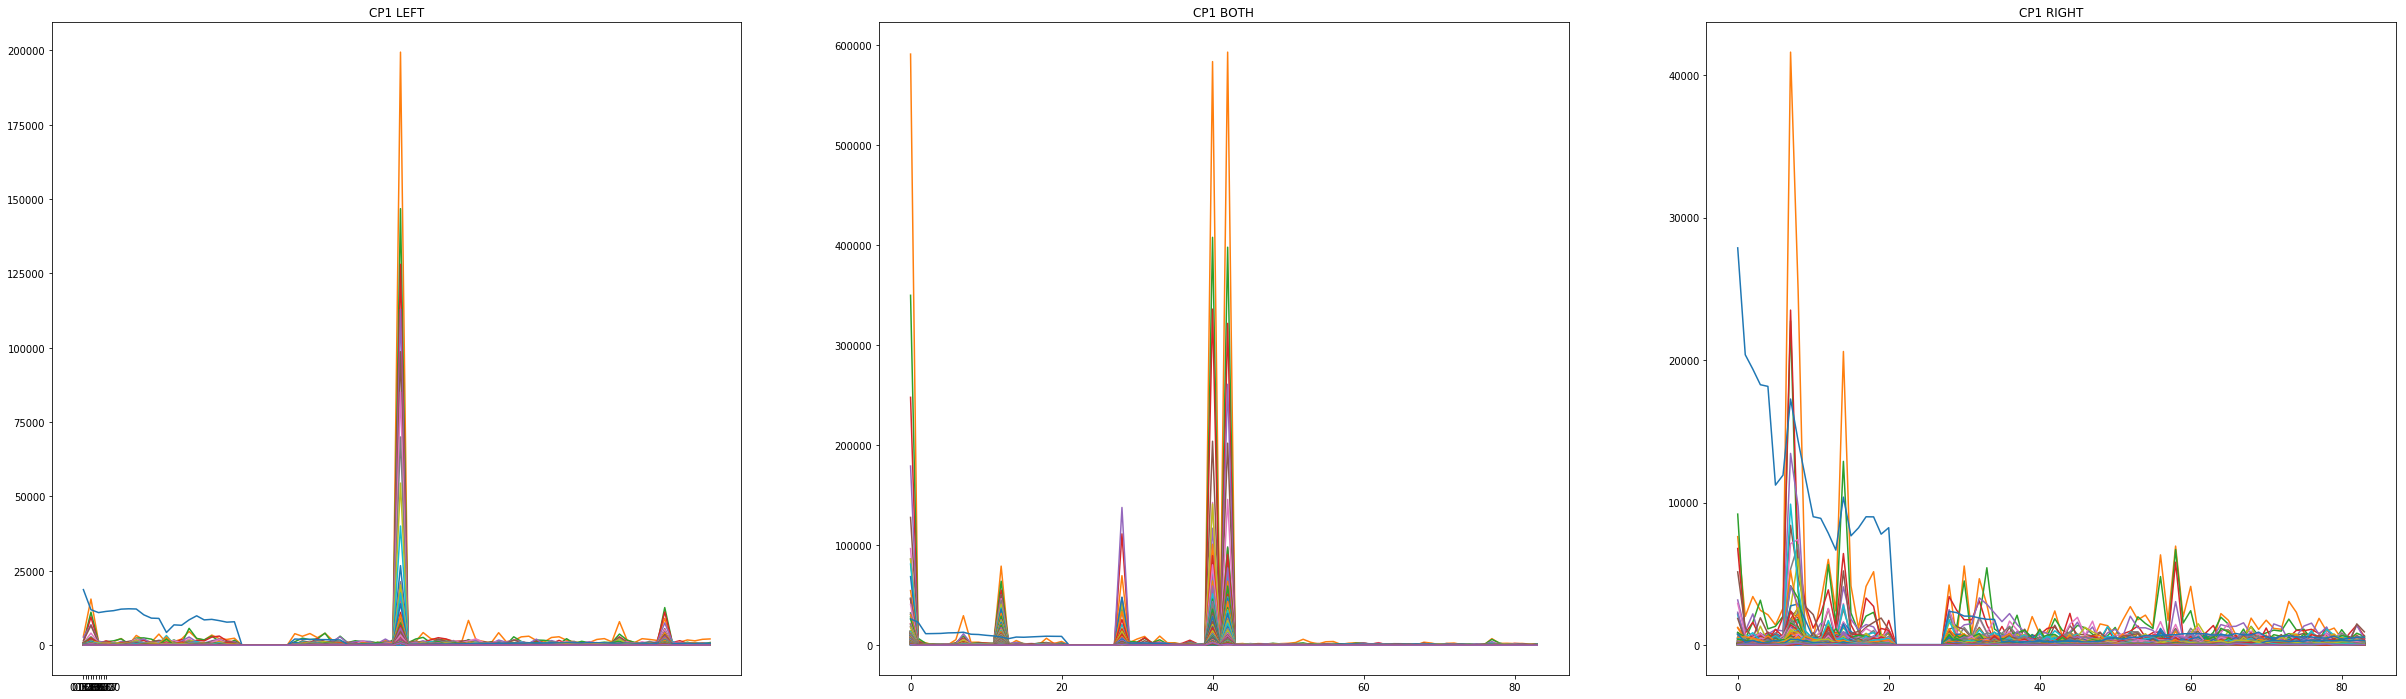

                 CP2


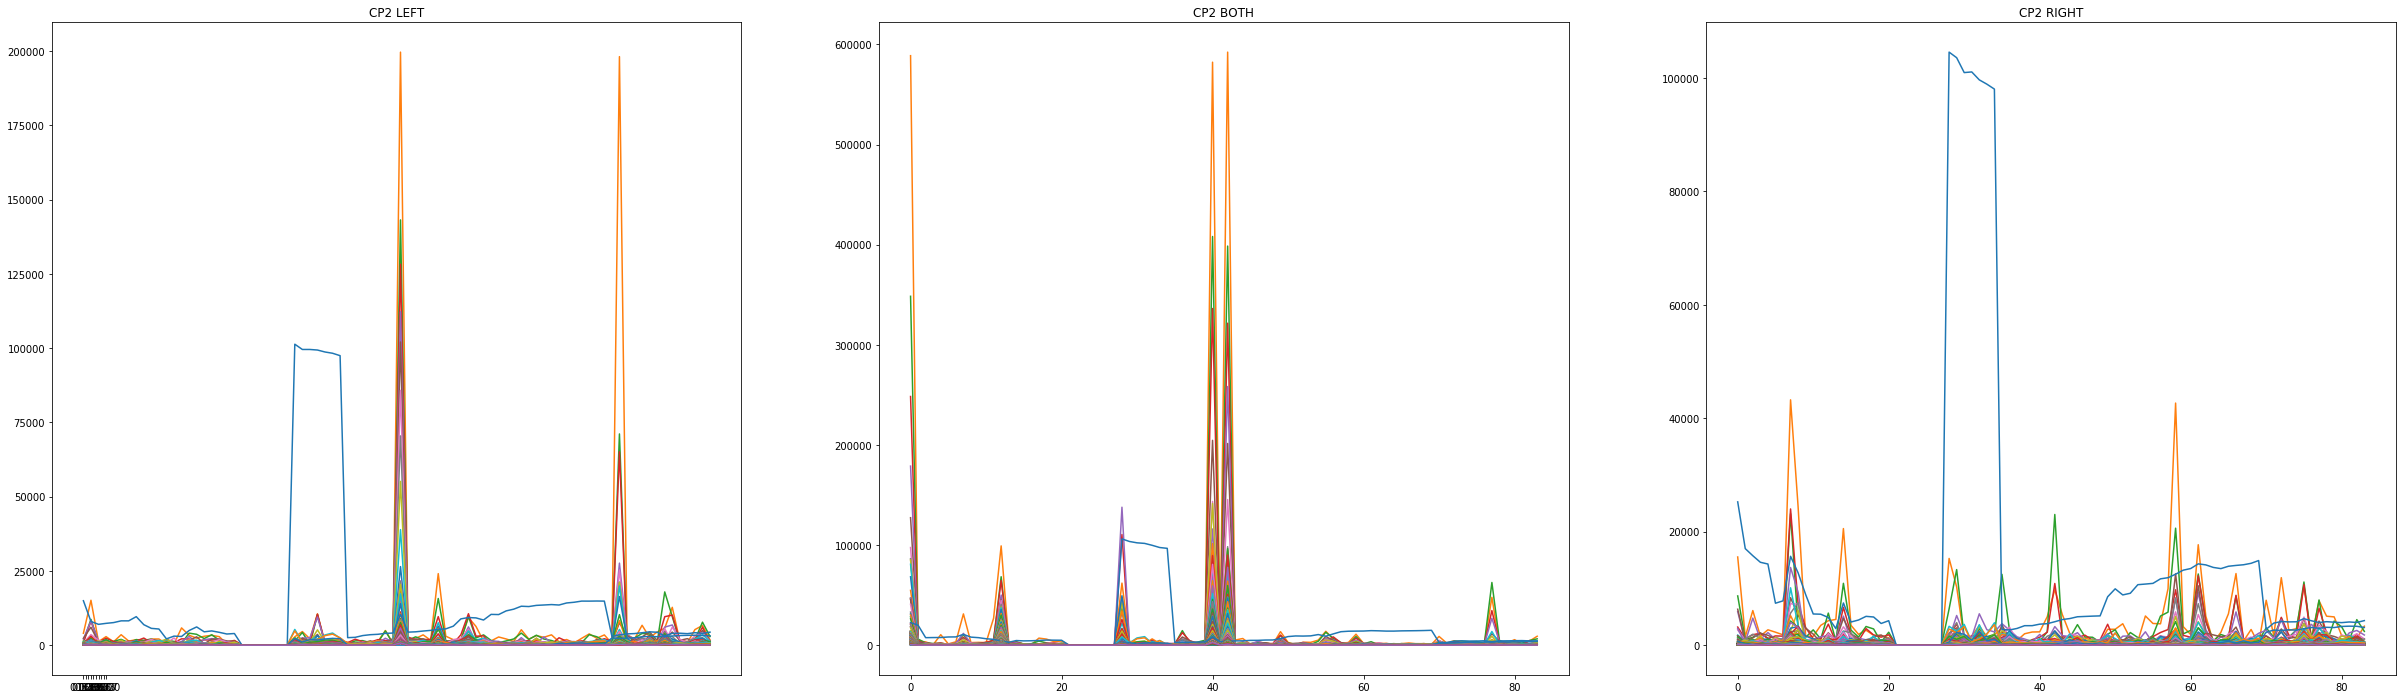

                 P3


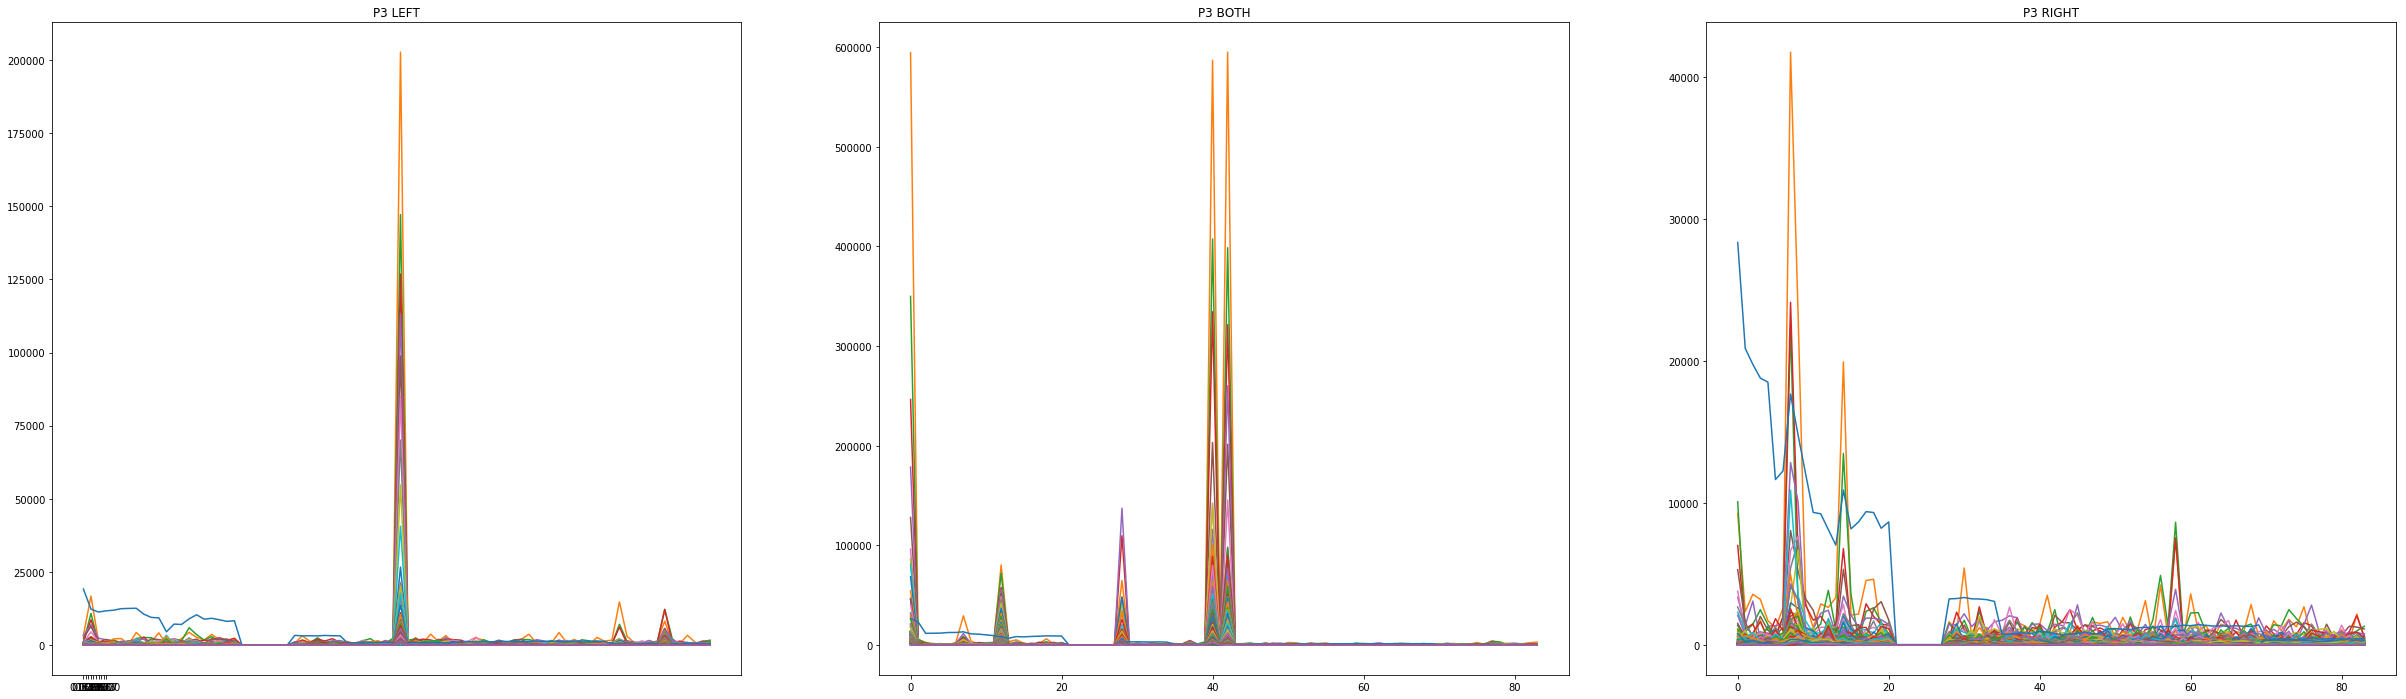

                 Pz


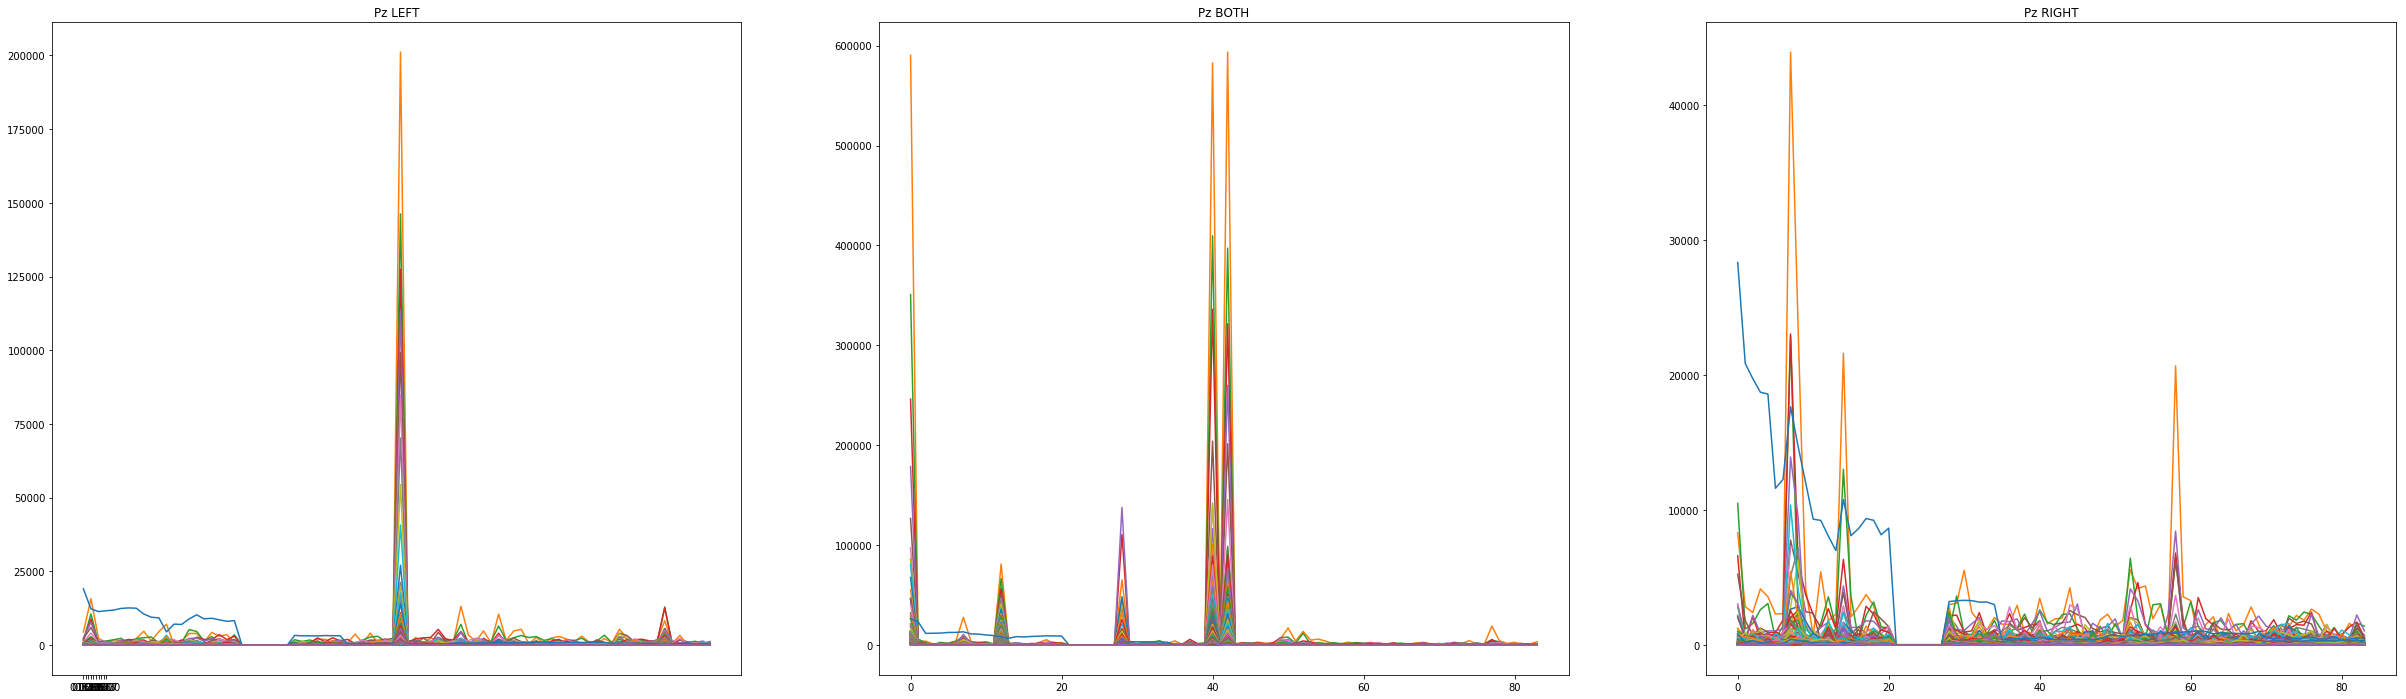

                 P4


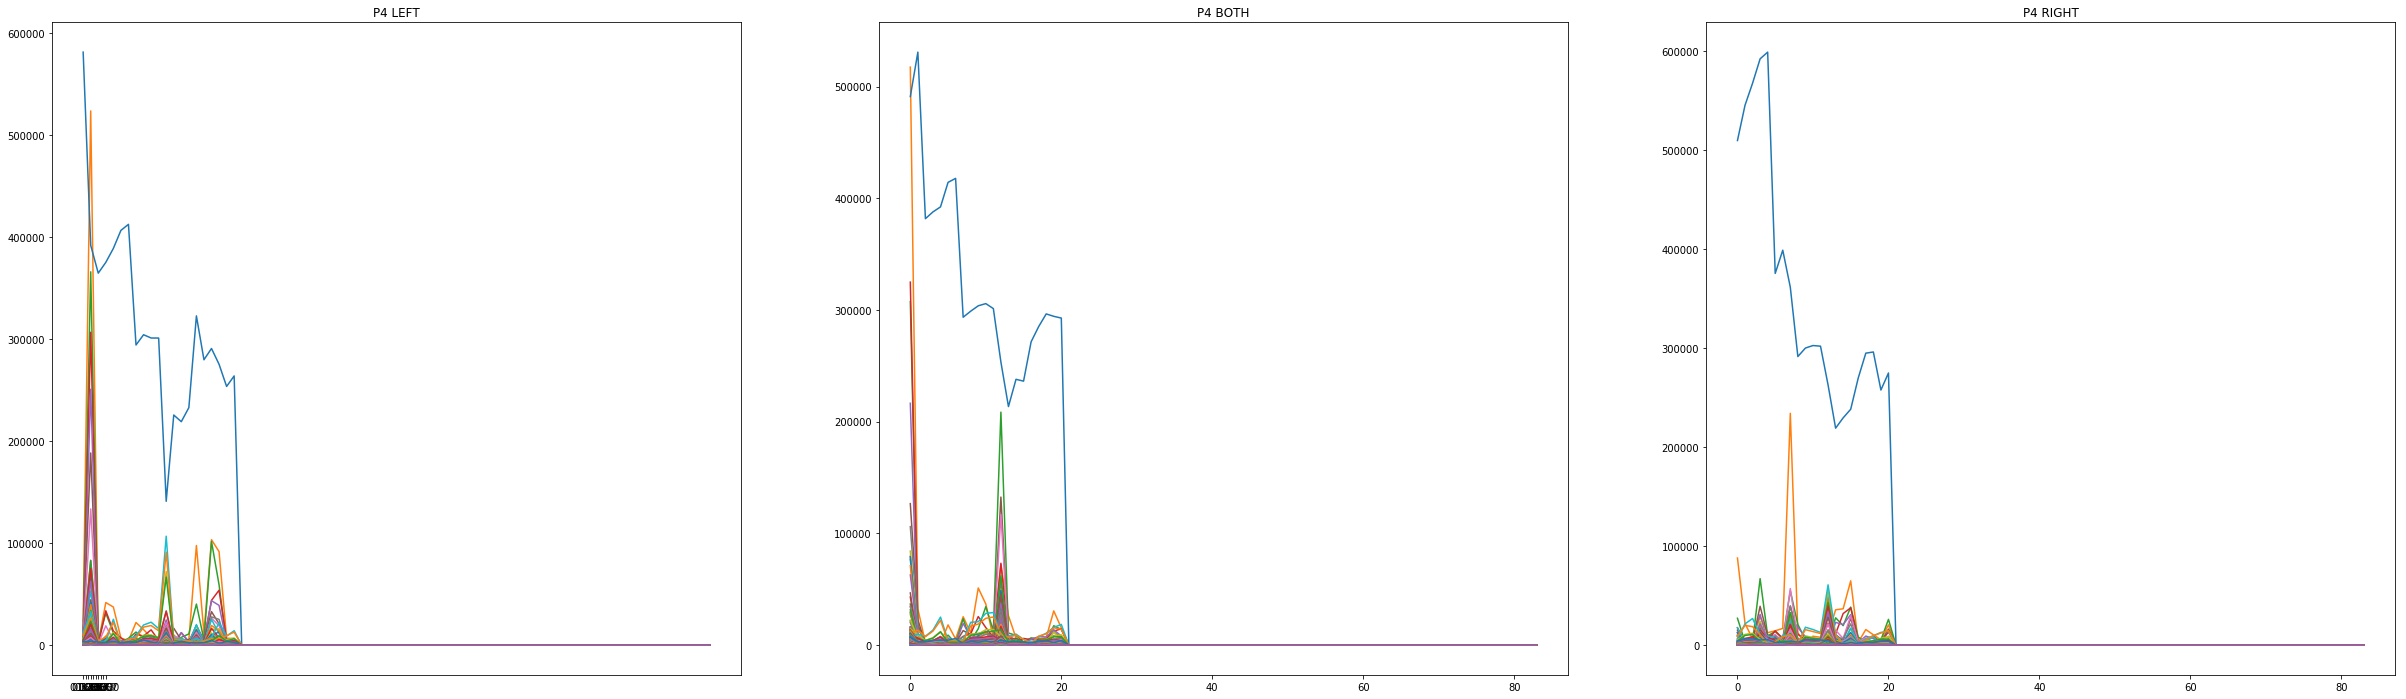

                 TP9


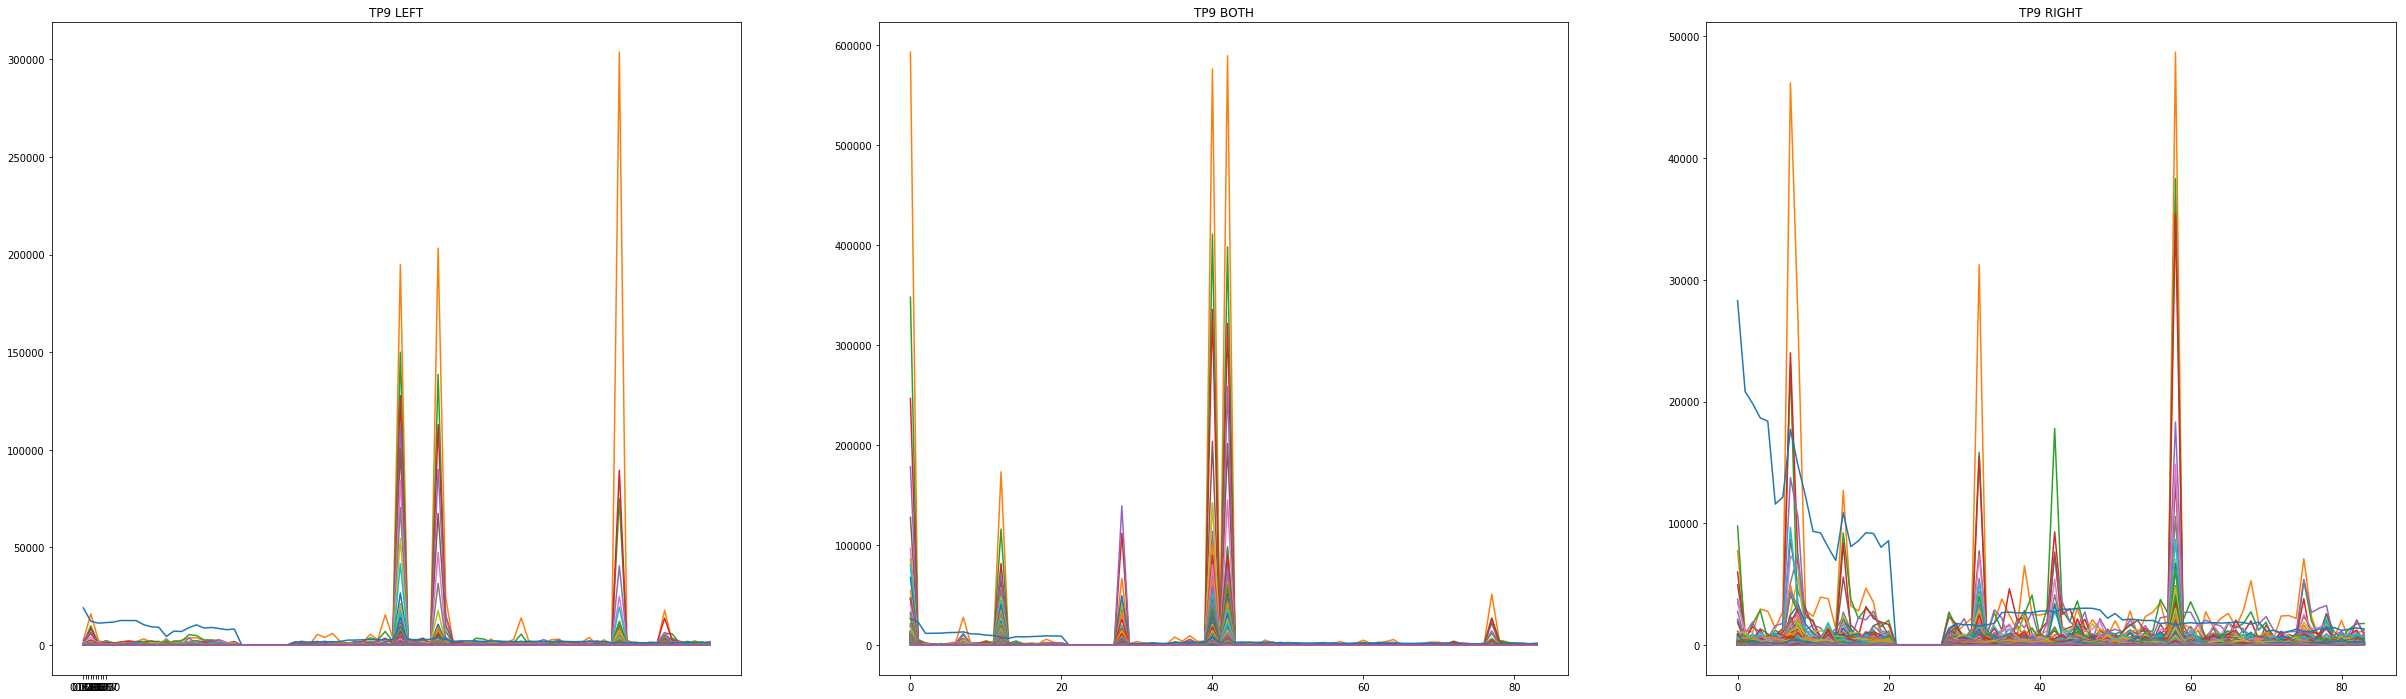

                 P7


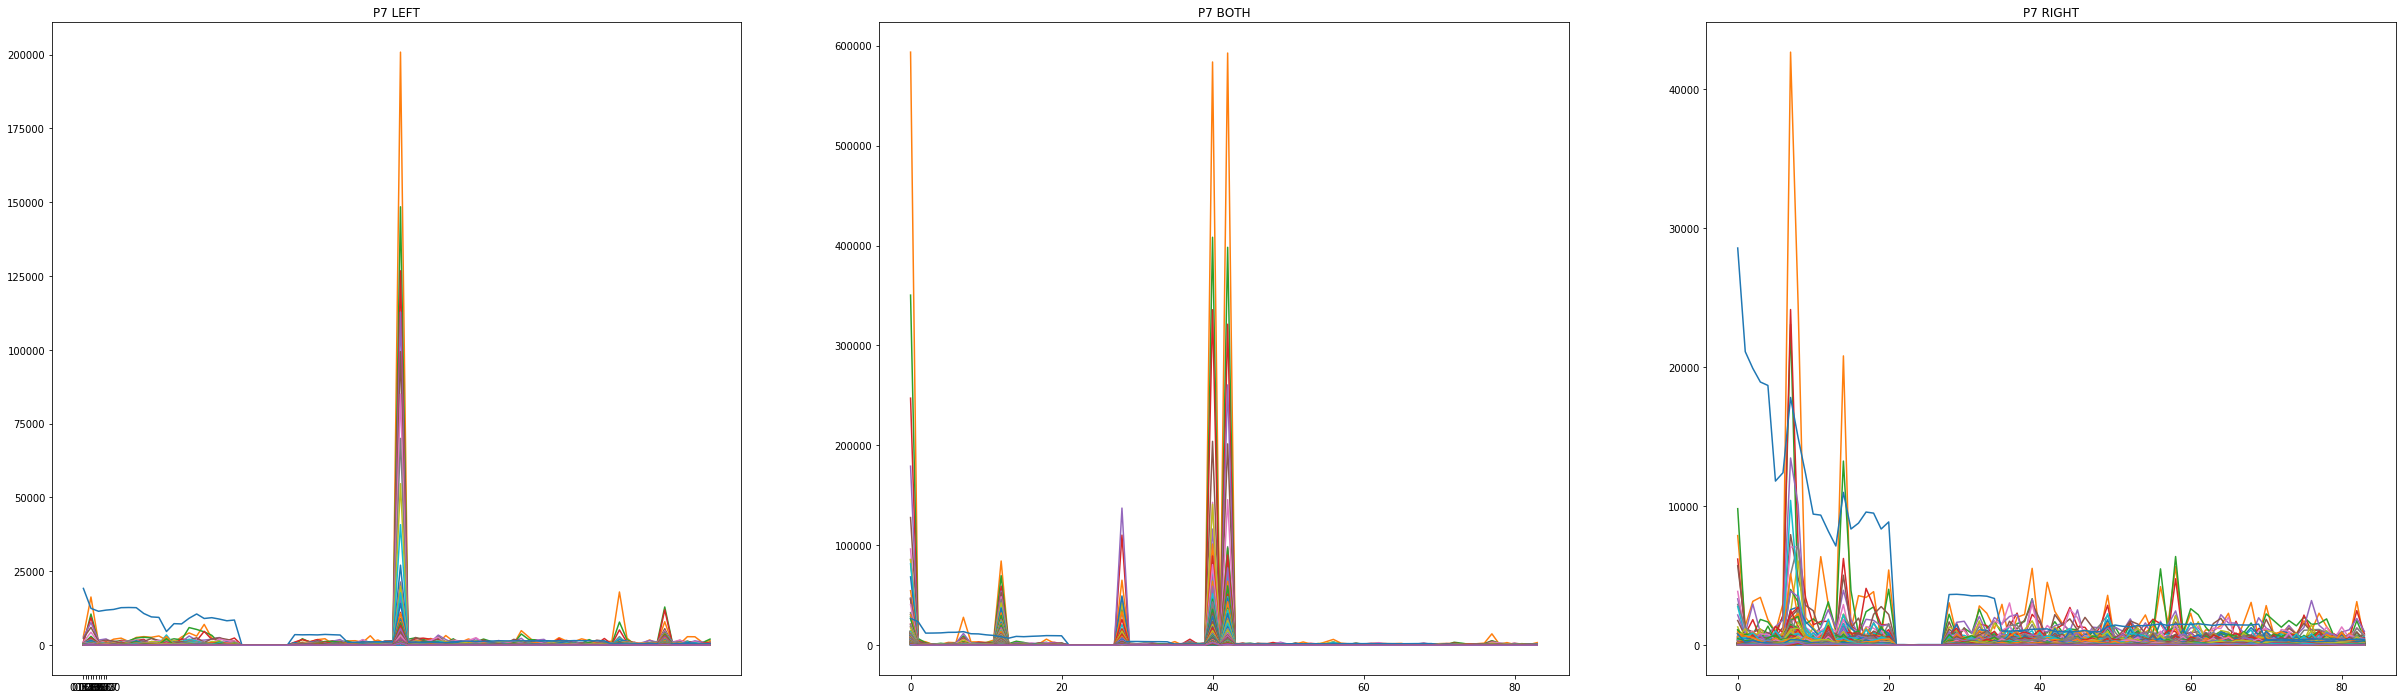

                 POz


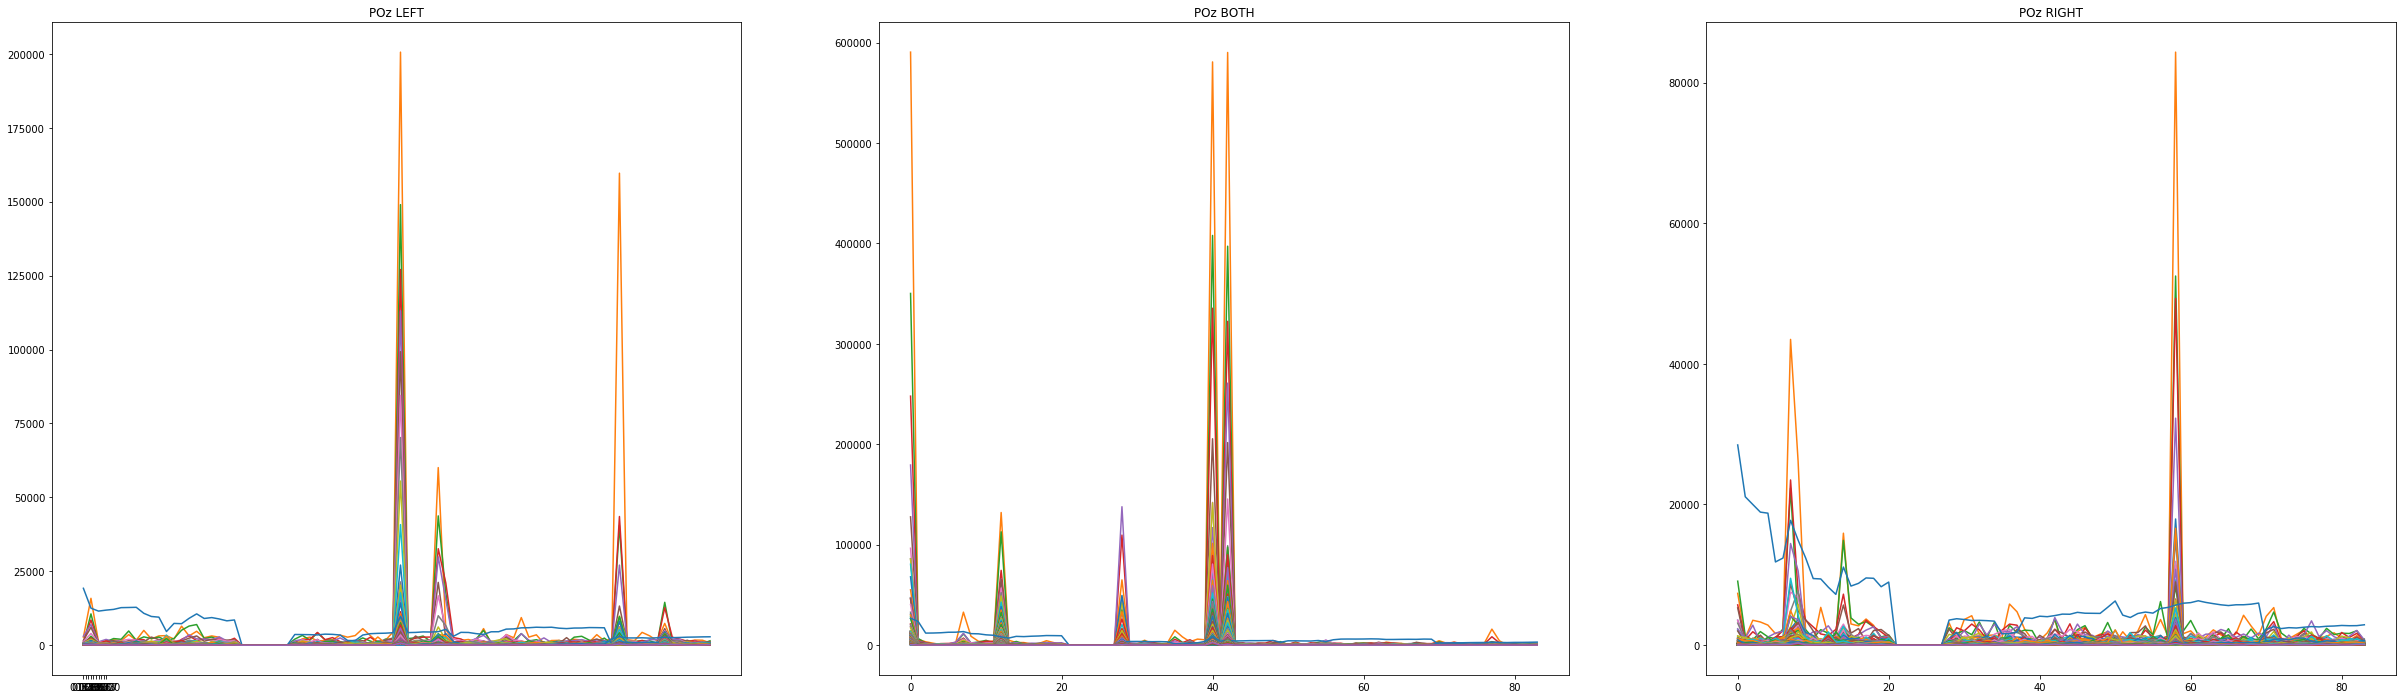

                 O1


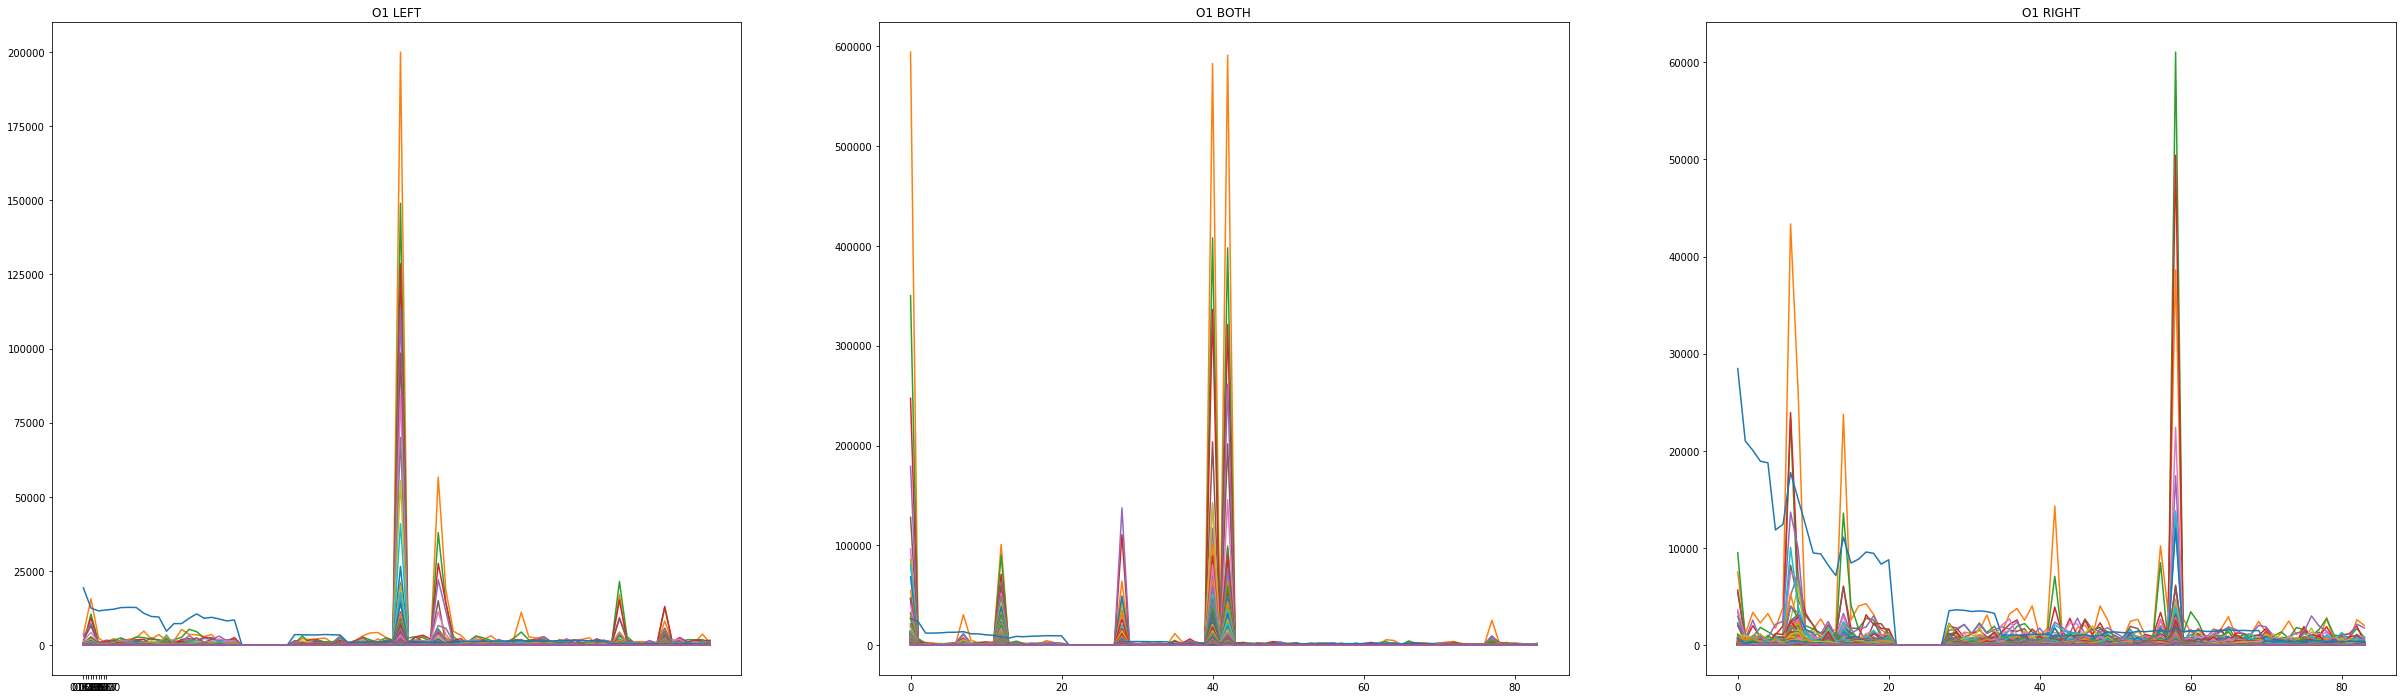

                 Oz


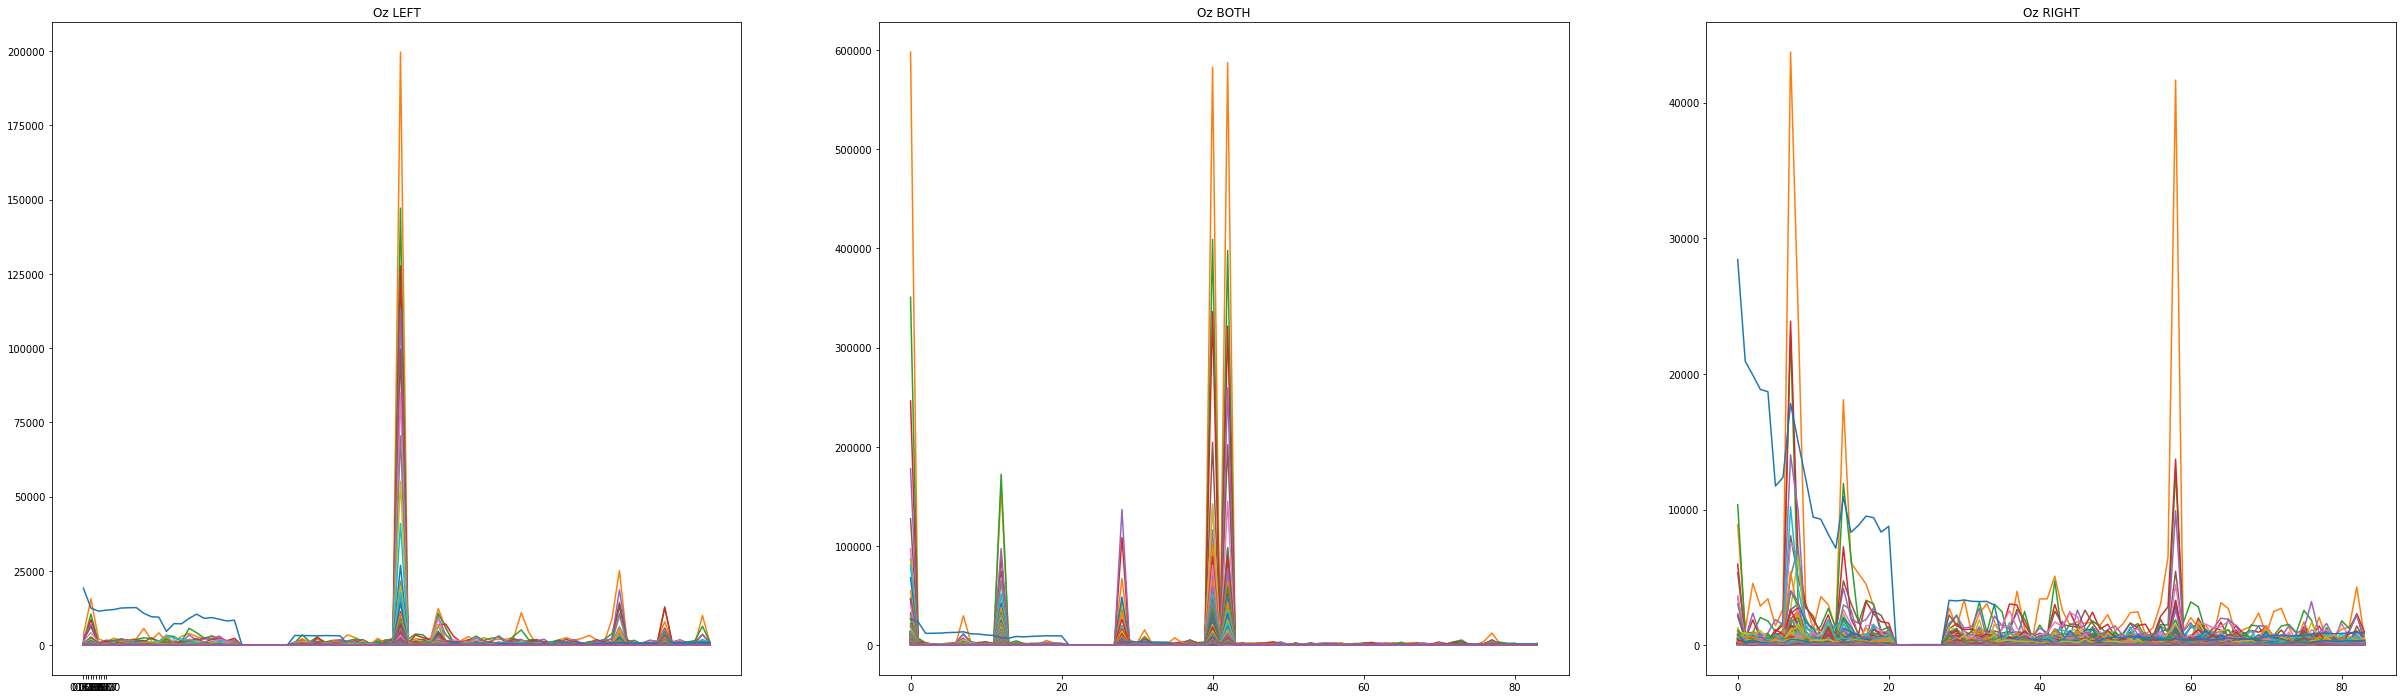

                 O2


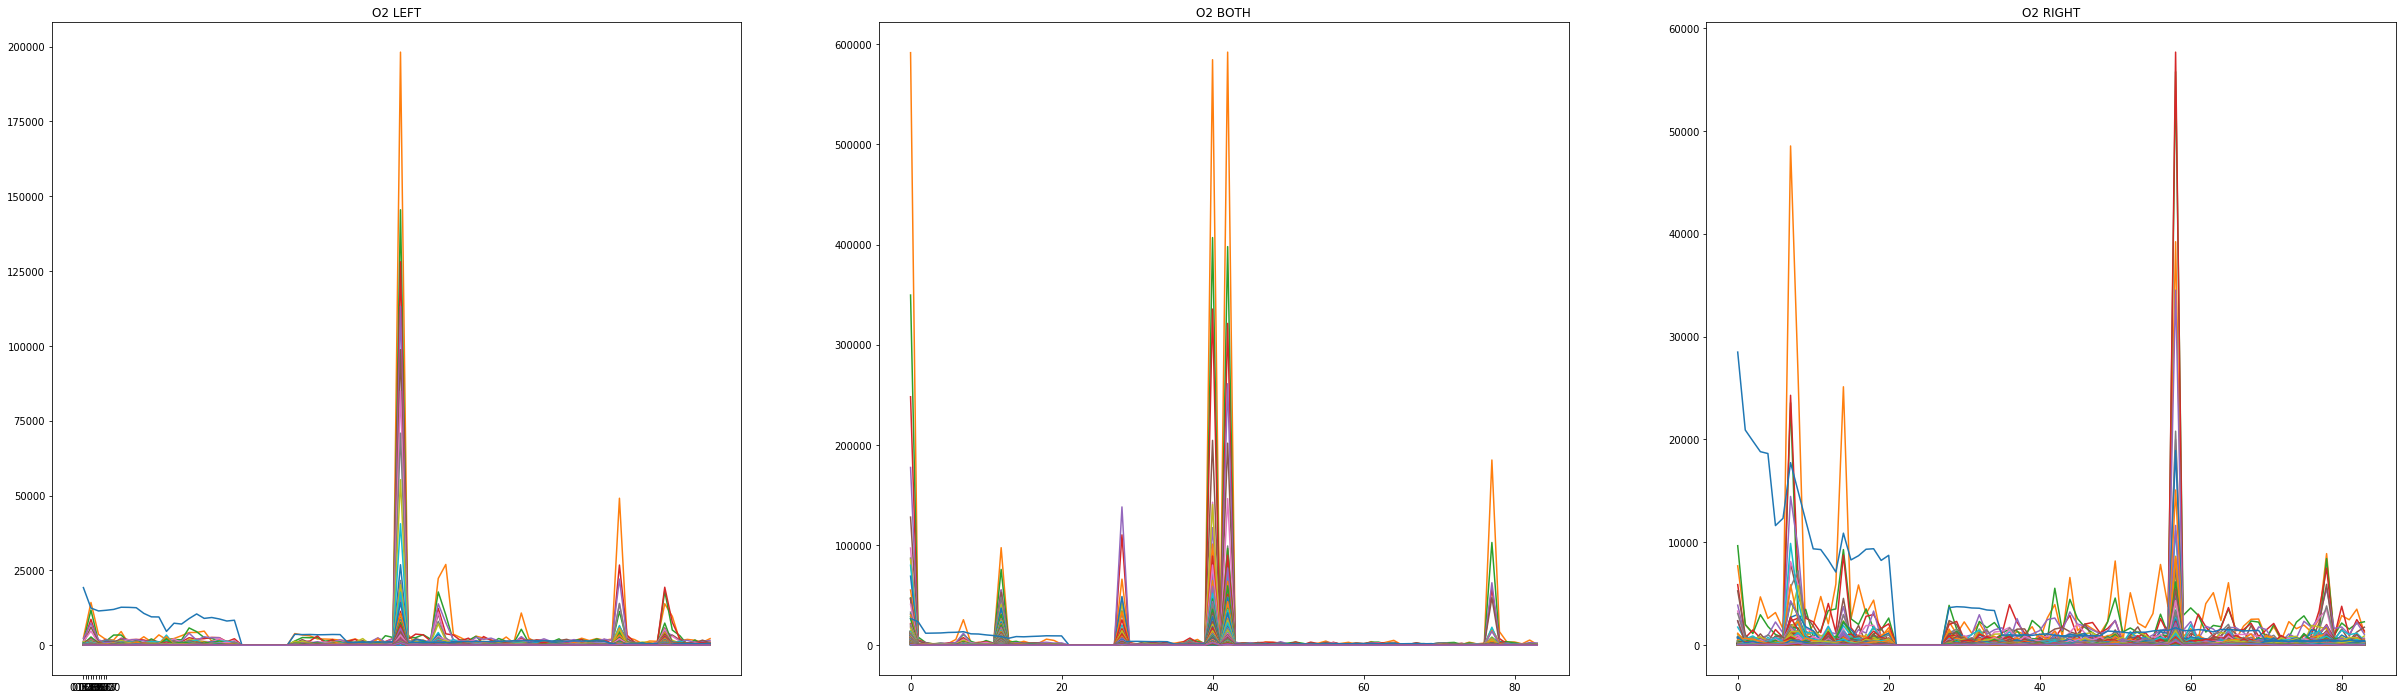

                 TP10


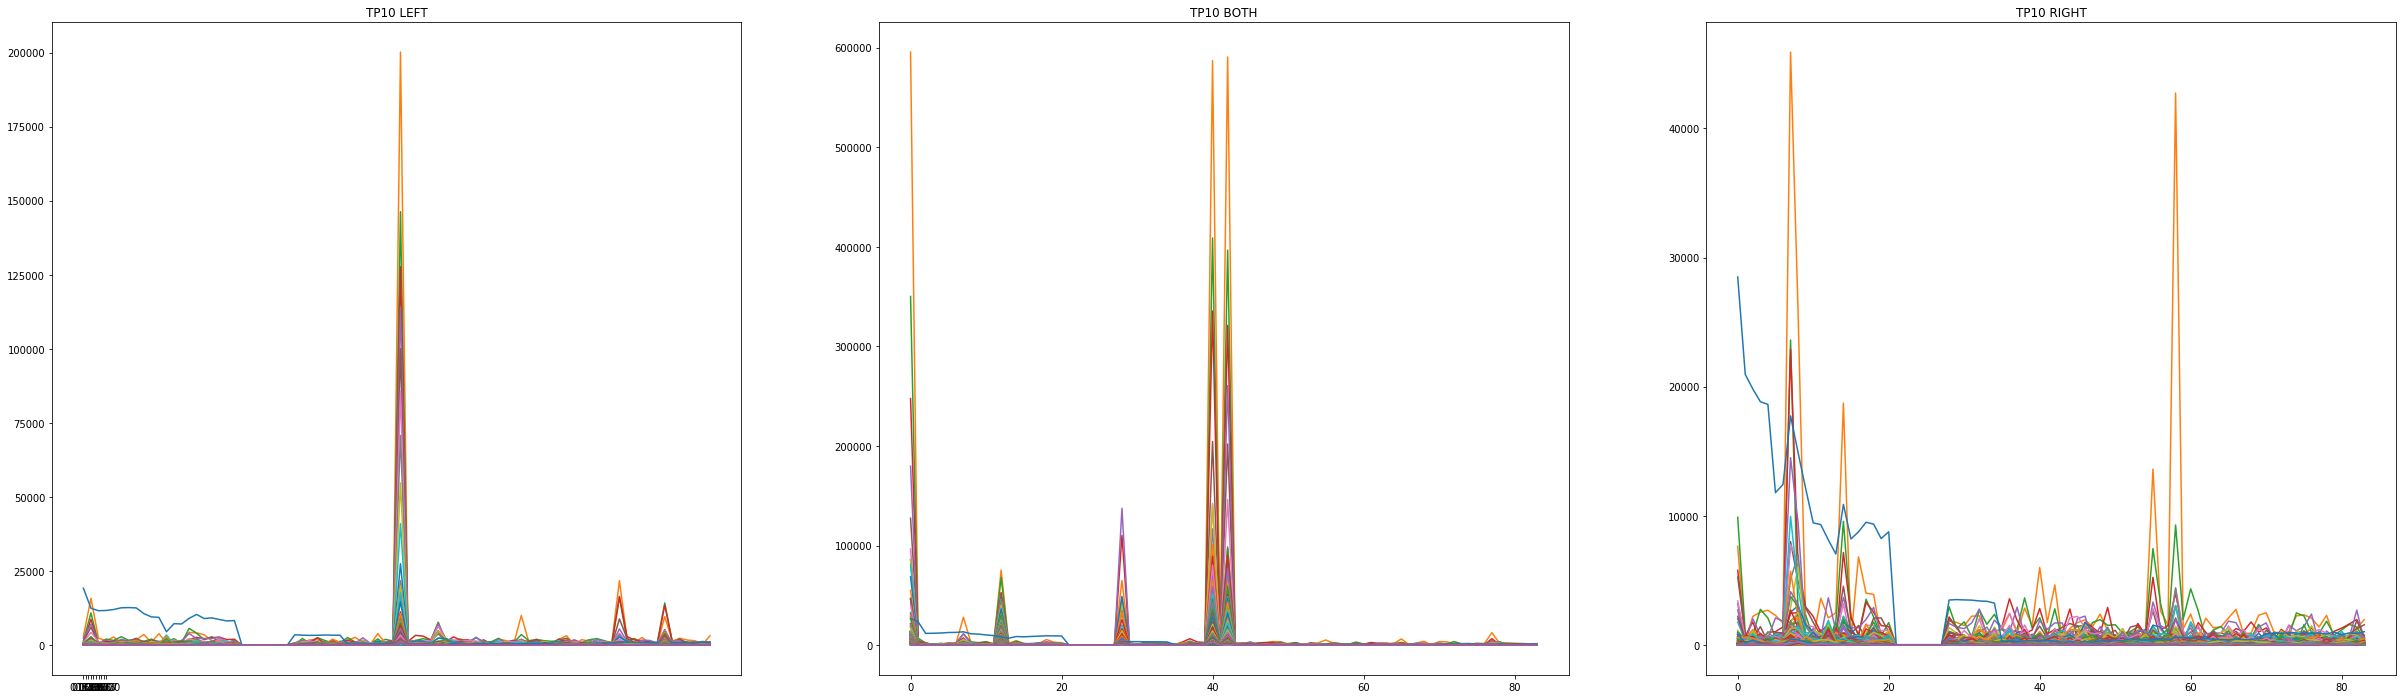

In [64]:

for num, channel in enumerate(list(ch_32_r.keys())):

    print('                 '+channel)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (42,12))

    ax1.plot(left_hand_mov[:,int(ch_32_r[channel]),:])
    ax1.set_xticks(freqs)
    ax1.set_title(channel +' LEFT')
    
    
    ax2.plot(both_hands_mov[:,int(ch_32_r[channel]),:])
    ax2.set_title(channel +' BOTH')
    
    ax3.plot(right_hand_mov[:,int(ch_32_r[channel]),:])
    ax3.set_title(channel + ' RIGHT')
    
    plt.savefig('channels_img/'+str(num)+'-'+channel+'.png')
    
    plt.show()

In [79]:
data = {'left_hand_mov':left_hand_mov, 'right_hand_mov': right_hand_mov, 'both_hands_mov' : both_hands_mov}
f = open('data_power.pk', 'wb')
pickle.dump(data, f)